# Introduction

Jupyter notebook for the simplest model scratch. By convention, all exogenous variables are presented with a overline line (*e.g.* $\overline a$) and the parameters are represented by greek letters (*e.g.* $\alpha$). The code in this document is executable and is strongly recommend to do the follow to ensure that the output is corrected and updated:

Run time > Restart and run all...

# Changes

In this version, the autonomous growth rate is endogenized as a function of housing own interest rates:

$$
g_Z = \phi_0  -\phi_1\cdot \left(\frac{1+r_{mo}}{1+\dot p_h}-1\right)
$$
which

- $\phi_0$ and $\phi_1$ are parameters
- $\dot p_h$ is housing inflation and equals 0 in this version

$$
\dot p_h = \frac{\Delta p_h}{p_{h_{-1}}}
$$

## Loading libraries

In [1]:
#!pip install pysolve3
%config InlineBackend.figure_format = 'retina'

from SFC_Setup import *
df = SolveSFC(model(), time=1000)

/home/gpetrini/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
t_check = 1
print('Evaluating at time = {}'.format(t_check))

test = model()
SolveSFC(test, time=t_check, table = False)
evaldf = pd.DataFrame({
    'Cw' : test.evaluate('Cw'),
    'Ck' : test.evaluate('Ck'),
    'I_h' : test.evaluate('I_h'),
    'I_f' : test.evaluate('I_f'),
    'K_f(-1)' : test.evaluate('K_f(-1)'),
    'Yk' : test.evaluate('Yk'),
    'Y' : test.evaluate('Y'),
    'gk' : test.evaluate('gk'),
    'u' : test.evaluate('u'),
    "Residual" : test.evaluate('d(L) + d(MO) - d(M)')
}, index = ['Sum'])
evaldf = evaldf.transpose()
evaldf.round(5)

Evaluating at time = 1


Sum
Cw         251.82140
Ck         237.76666
I_h        101.90000
I_f         38.06553
K_f(-1)   1038.06553
Yk         400.00000
Y          629.55351
gk           0.03807
u            1.57388
Residual     0.00000

In [3]:
t_check=200
variable = 'gamma_F'
for i in range(0,11,1):
    i = i/10
    print(f'{variable} = {i}')
    check = model(gamma_F=i)
    SolveSFC(check, time=t_check, table = False)
    evaldf = pd.DataFrame({
        'S_hk > 0?' : check.evaluate('S_hk')>0,
        'NFW_h > 0?' : check.evaluate('NFW_h')>0,
        'NFW_f > 0?' : check.evaluate('NFW_f')>0,
        'NFW_b ~ 0?' : check.evaluate('NFW_b'),
        'V_b ~ 0?' : check.evaluate('V_b'),
        'Lf > 0?': check.evaluate('Lf')>0,
        'u:': check.evaluate('u'),
        'FT > Fn?': check.evaluate('FT')>check.evaluate('Fn'), 
        "Residual" : check.evaluate('d(L) + d(MO) - d(M)')
    }, index = [f'{variable} = {i}'])
    evaldf = evaldf.transpose().round(5)
    print(evaldf)

gamma_F = 0.0
           gamma_F = 0.0
S_hk > 0?           True
NFW_h > 0?          True
NFW_f > 0?         False
NFW_b ~ 0?   0.000928314
V_b ~ 0?       0.0939694
Lf > 0?             True
u:              0.704439
FT > Fn?            True
Residual               0
gamma_F = 0.1
           gamma_F = 0.1
S_hk > 0?           True
NFW_h > 0?          True
NFW_f > 0?         False
NFW_b ~ 0?   0.000928314
V_b ~ 0?       0.0939694
Lf > 0?             True
u:              0.704439
FT > Fn?            True
Residual               0
gamma_F = 0.2
           gamma_F = 0.2
S_hk > 0?           True
NFW_h > 0?         False
NFW_f > 0?          True
NFW_b ~ 0?   0.000928314
V_b ~ 0?       0.0939694
Lf > 0?            False
u:              0.704439
FT > Fn?           False
Residual               0
gamma_F = 0.3
           gamma_F = 0.3
S_hk > 0?           True
NFW_h > 0?         False
NFW_f > 0?          True
NFW_b ~ 0?   0.000928314
V_b ~ 0?       0.0939694
Lf > 0?            False
u:              0.7

# Solving

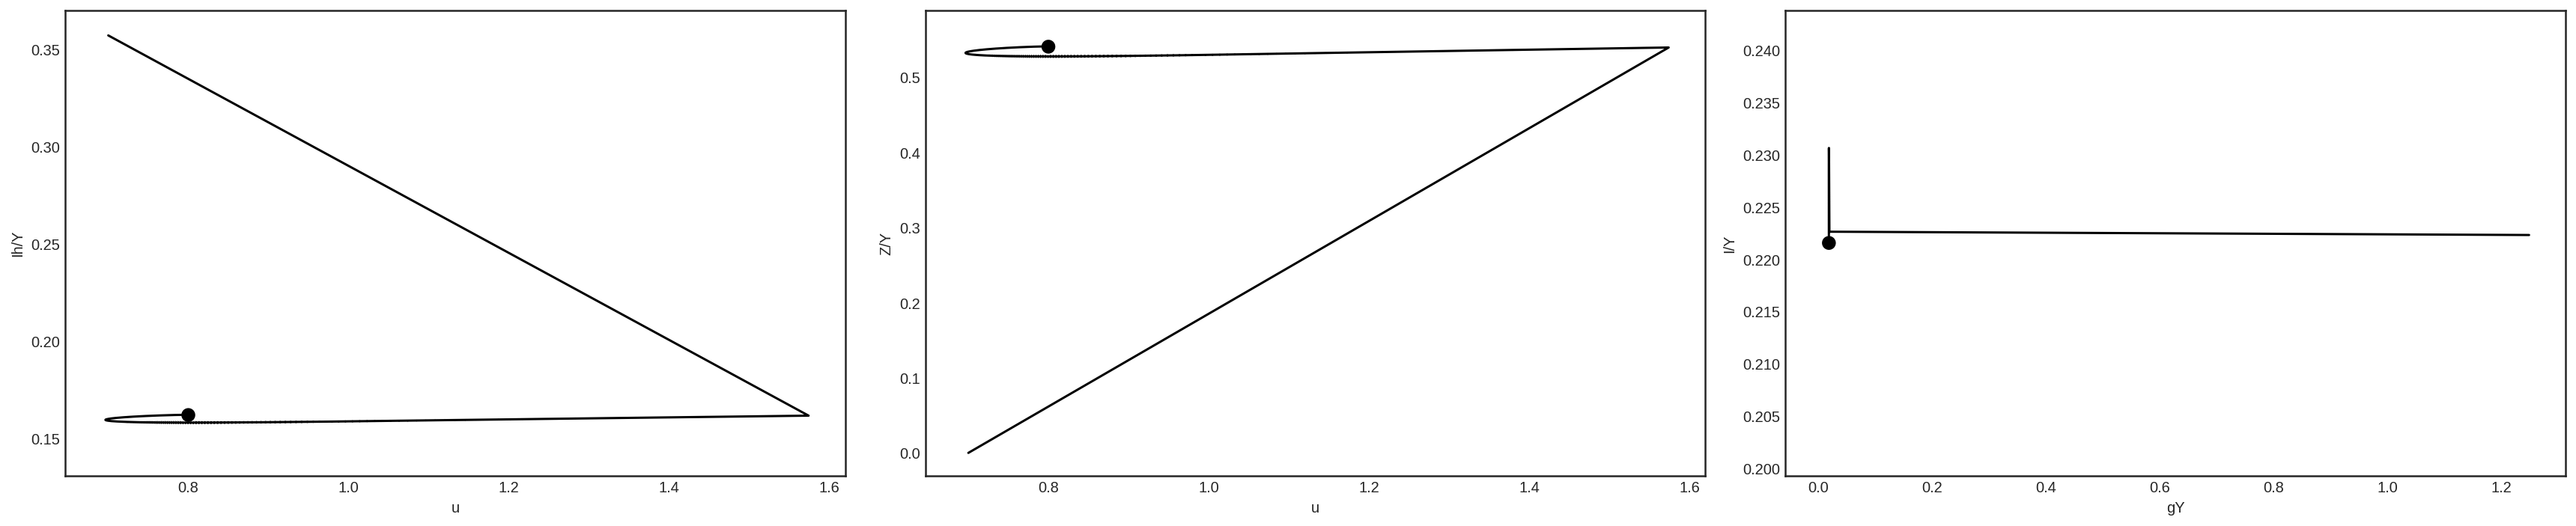

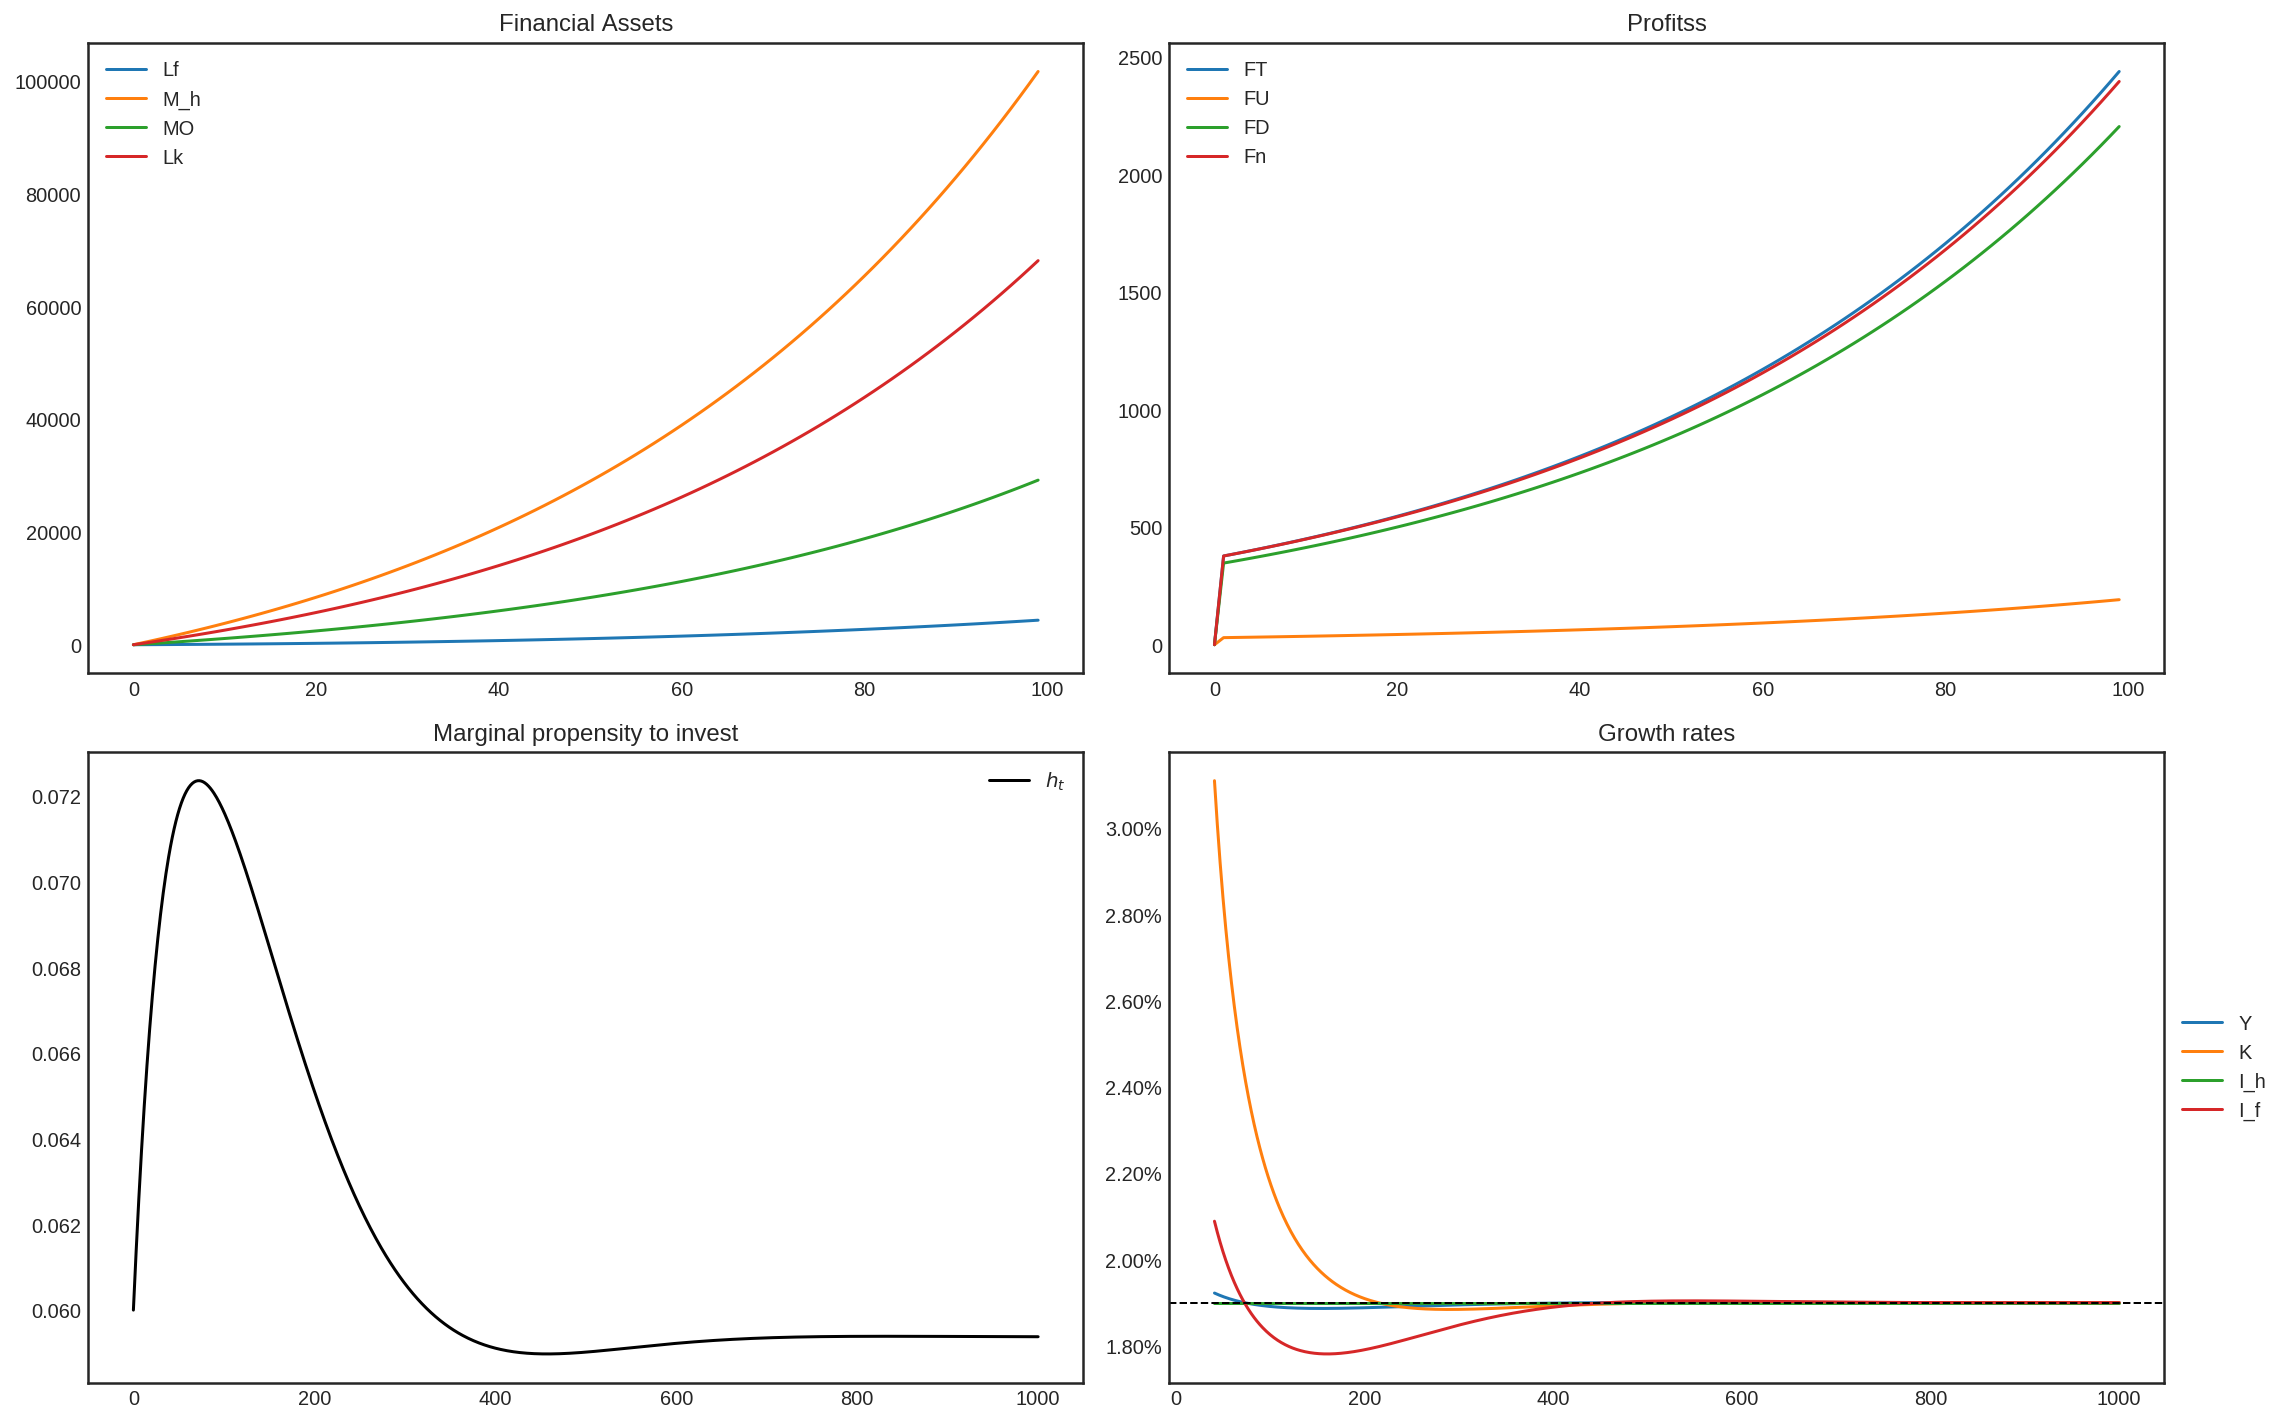

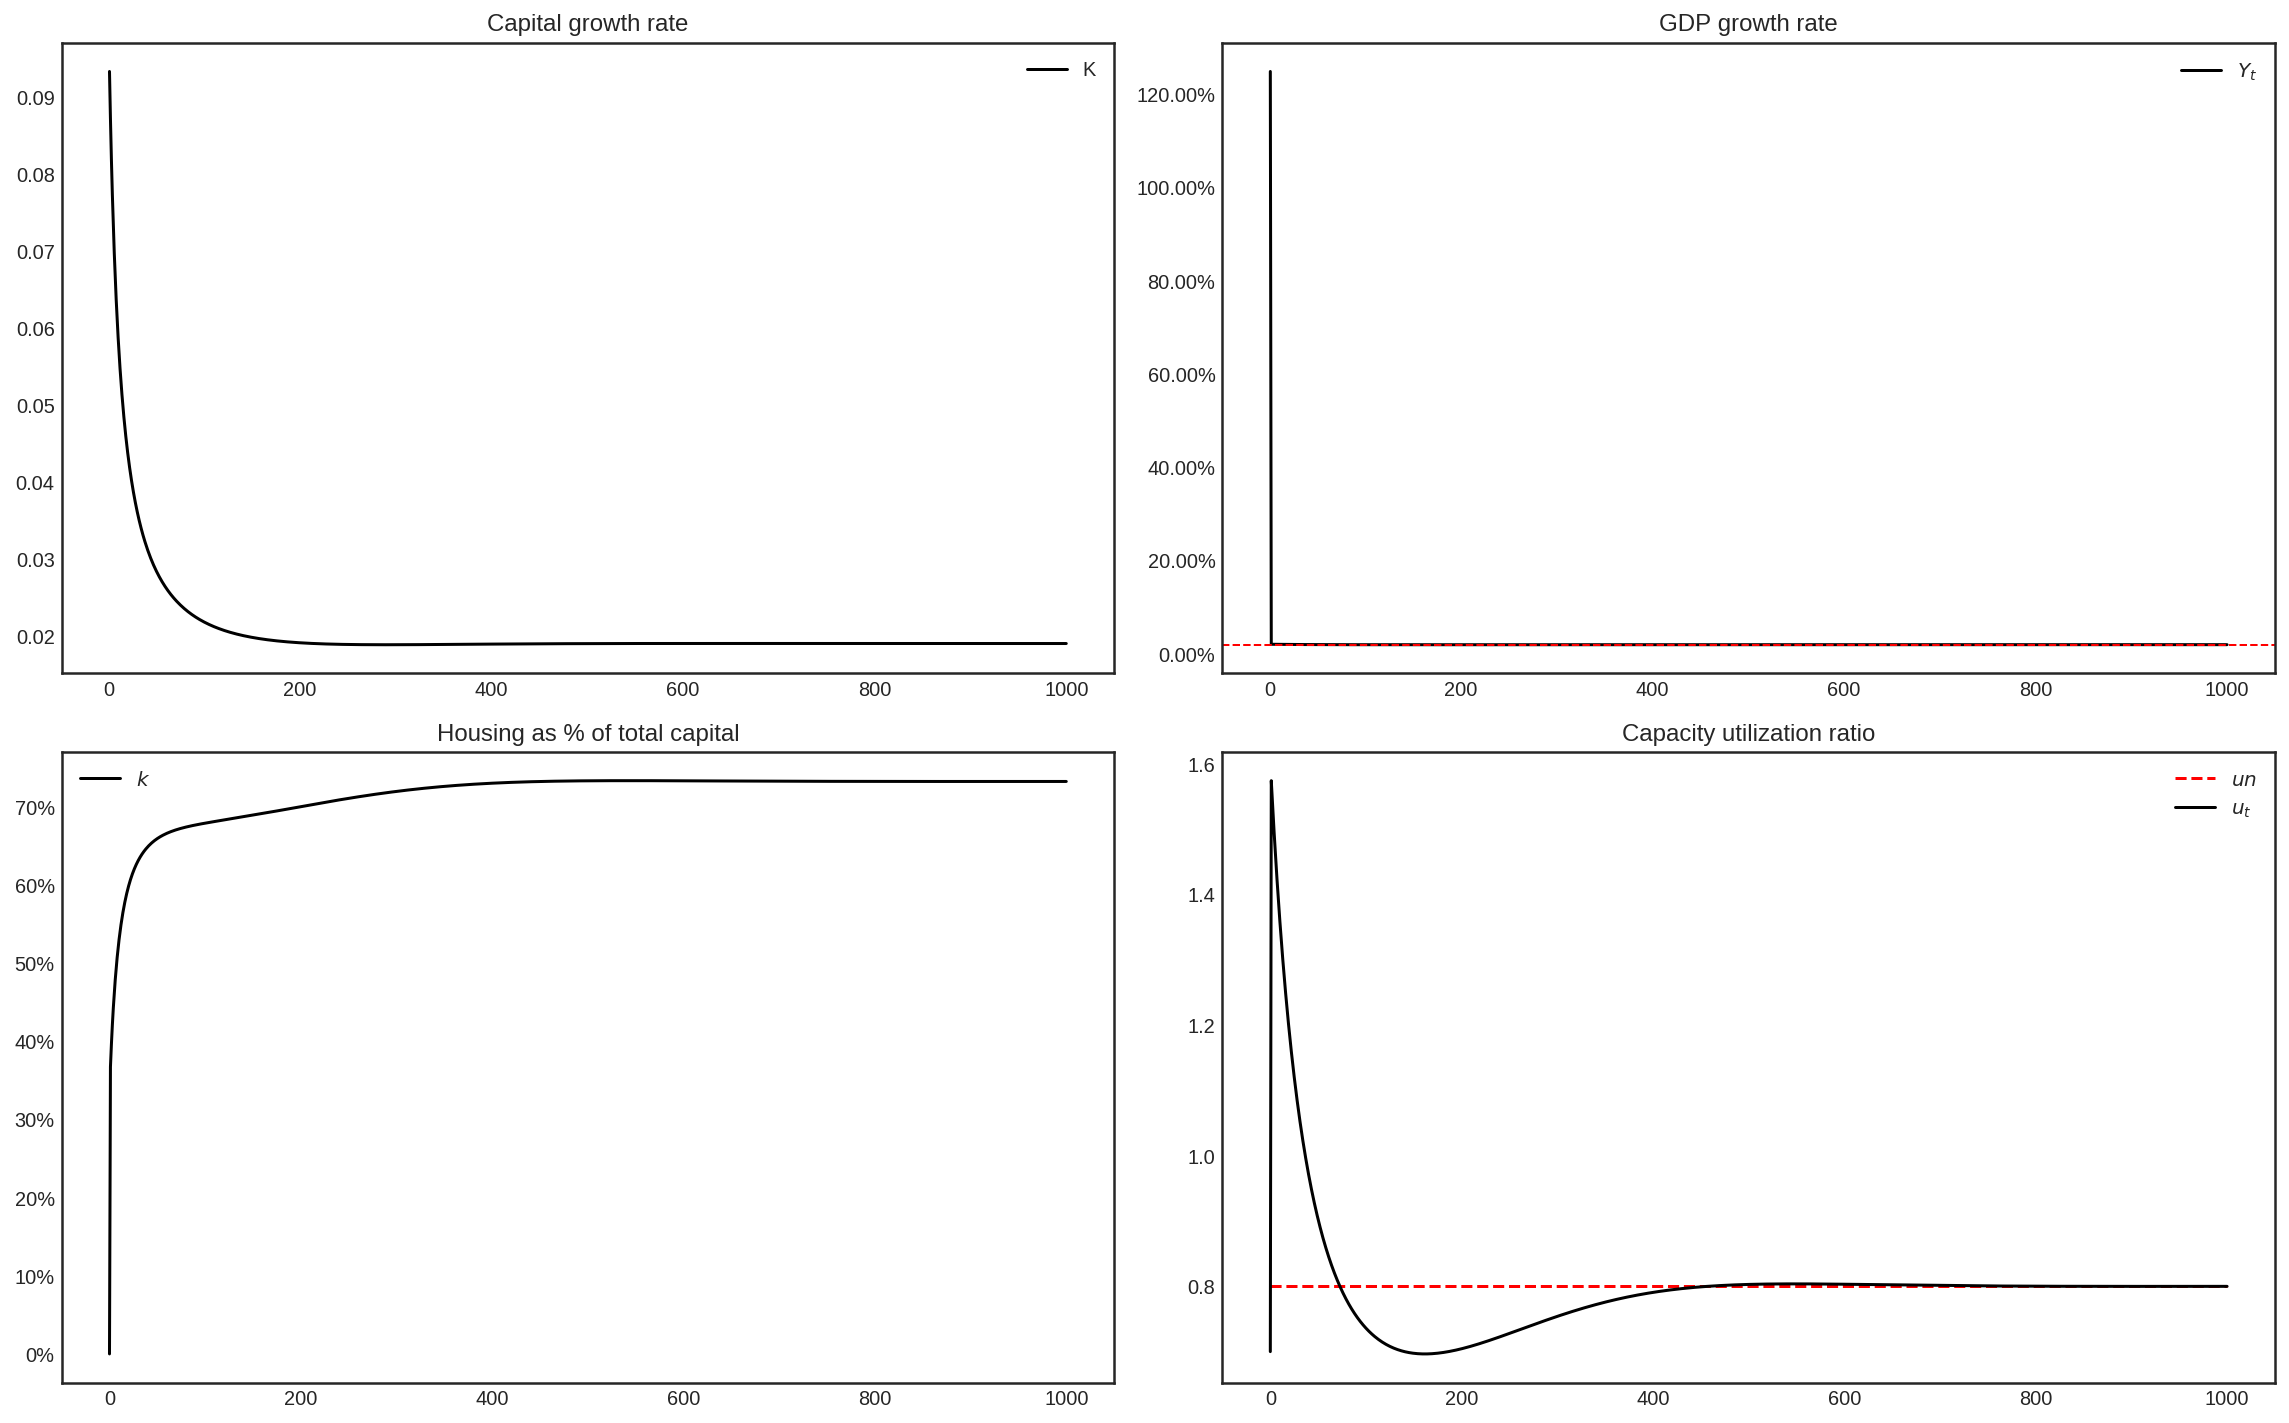

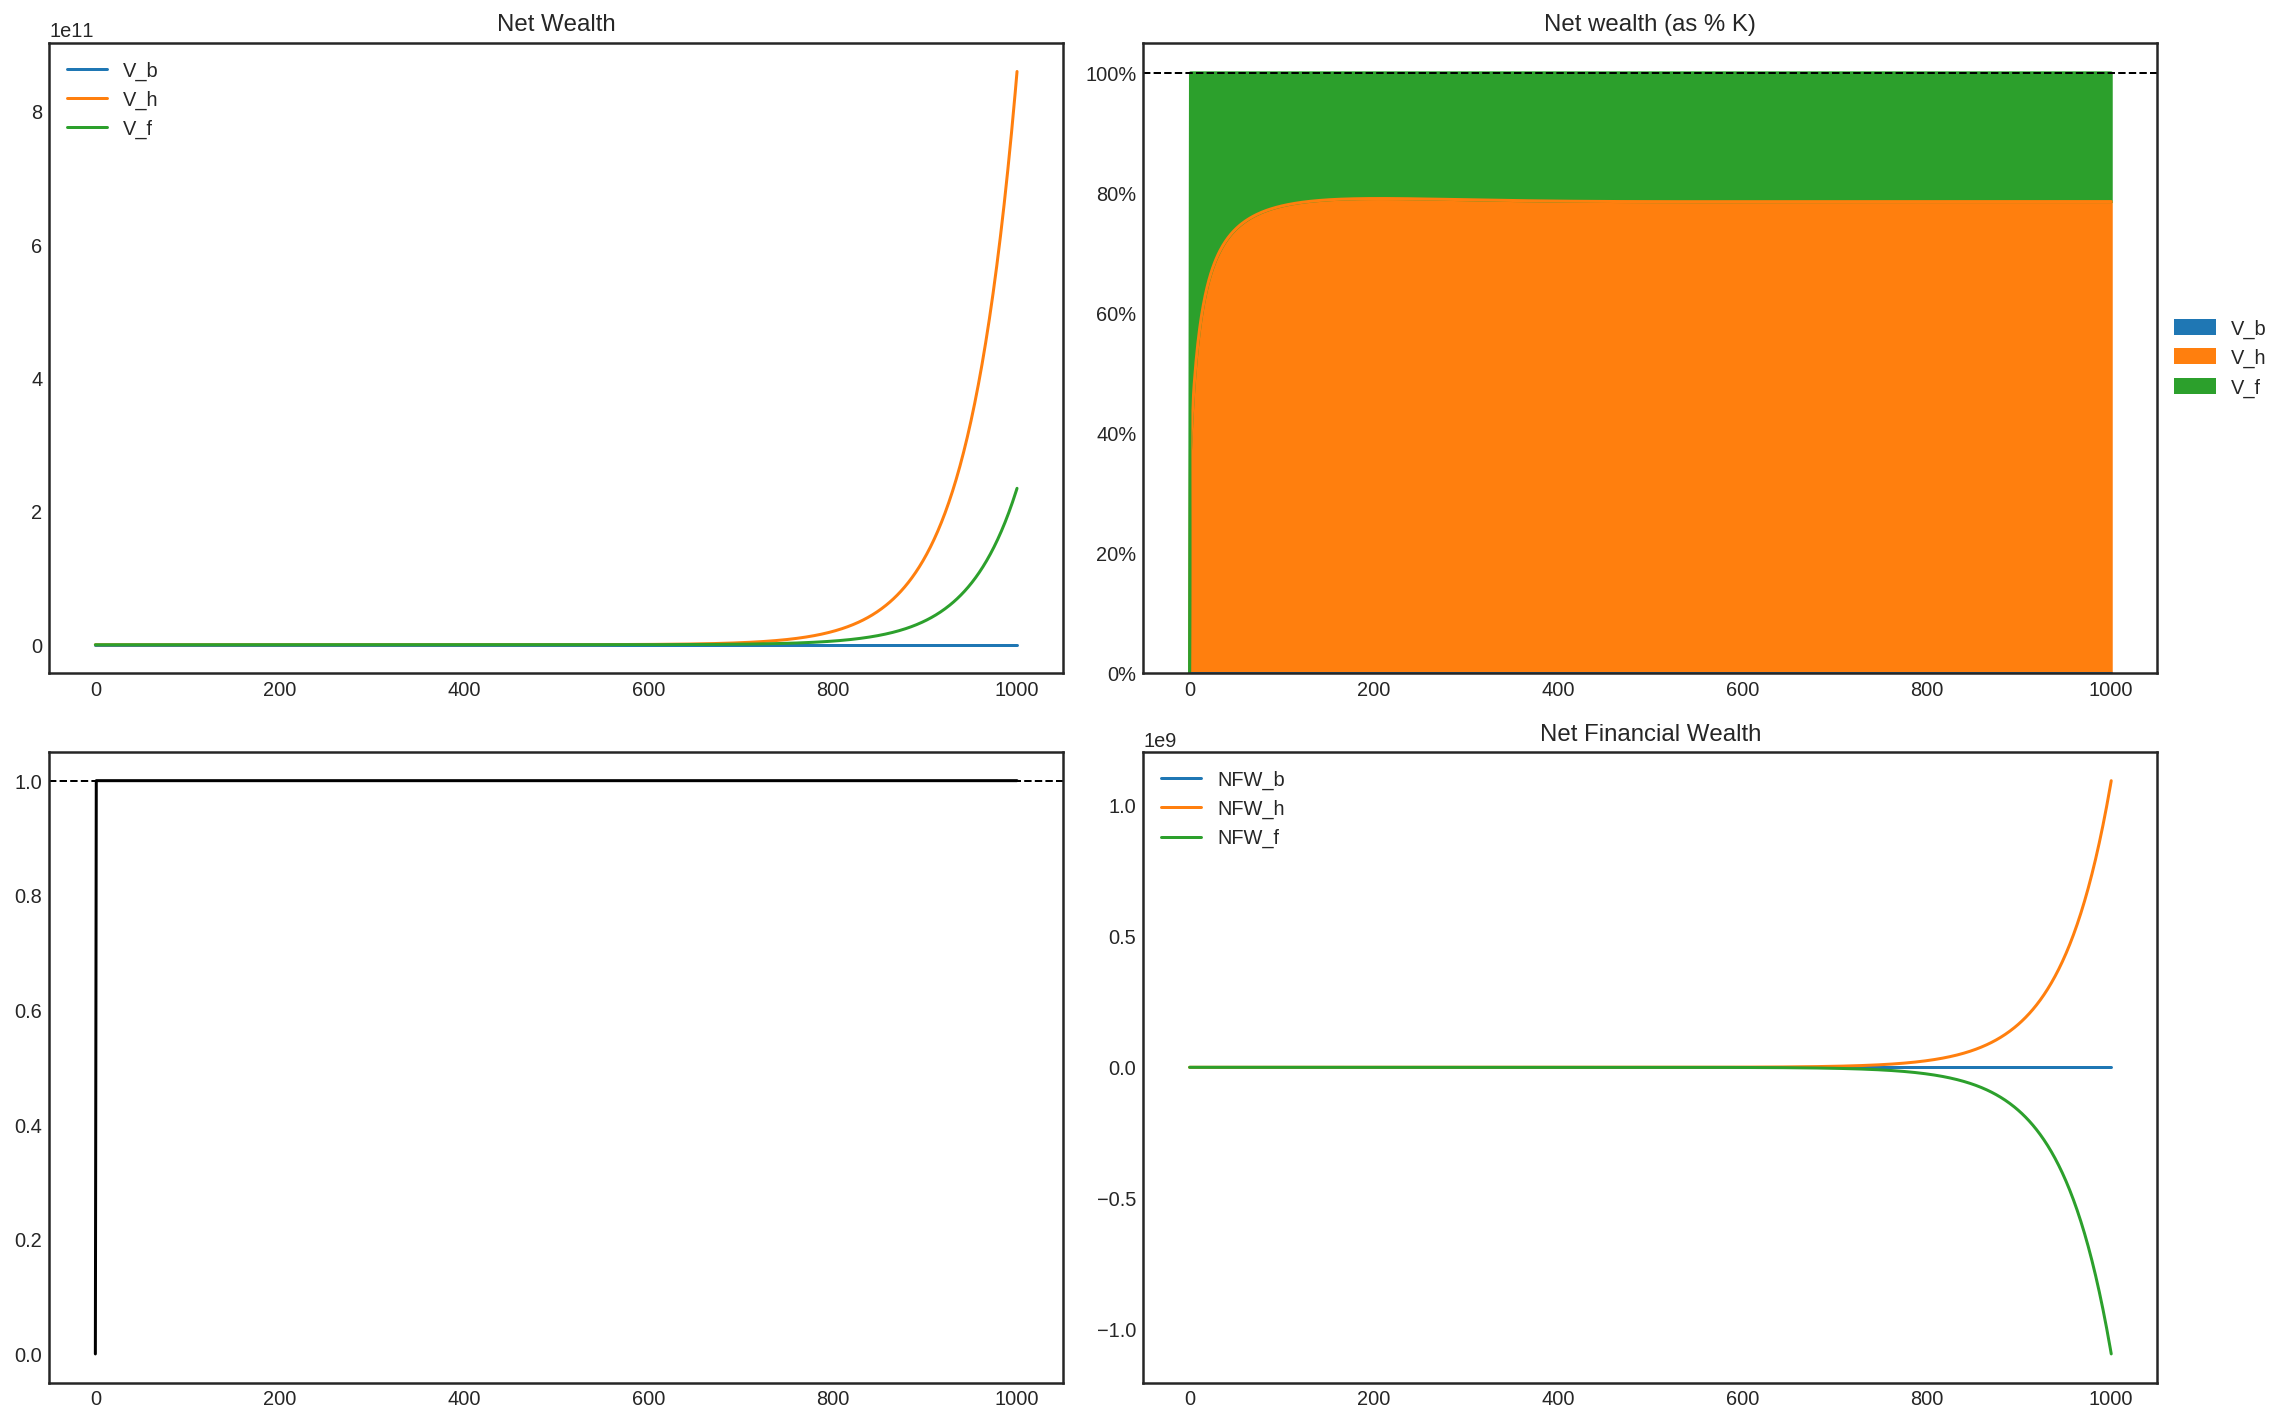

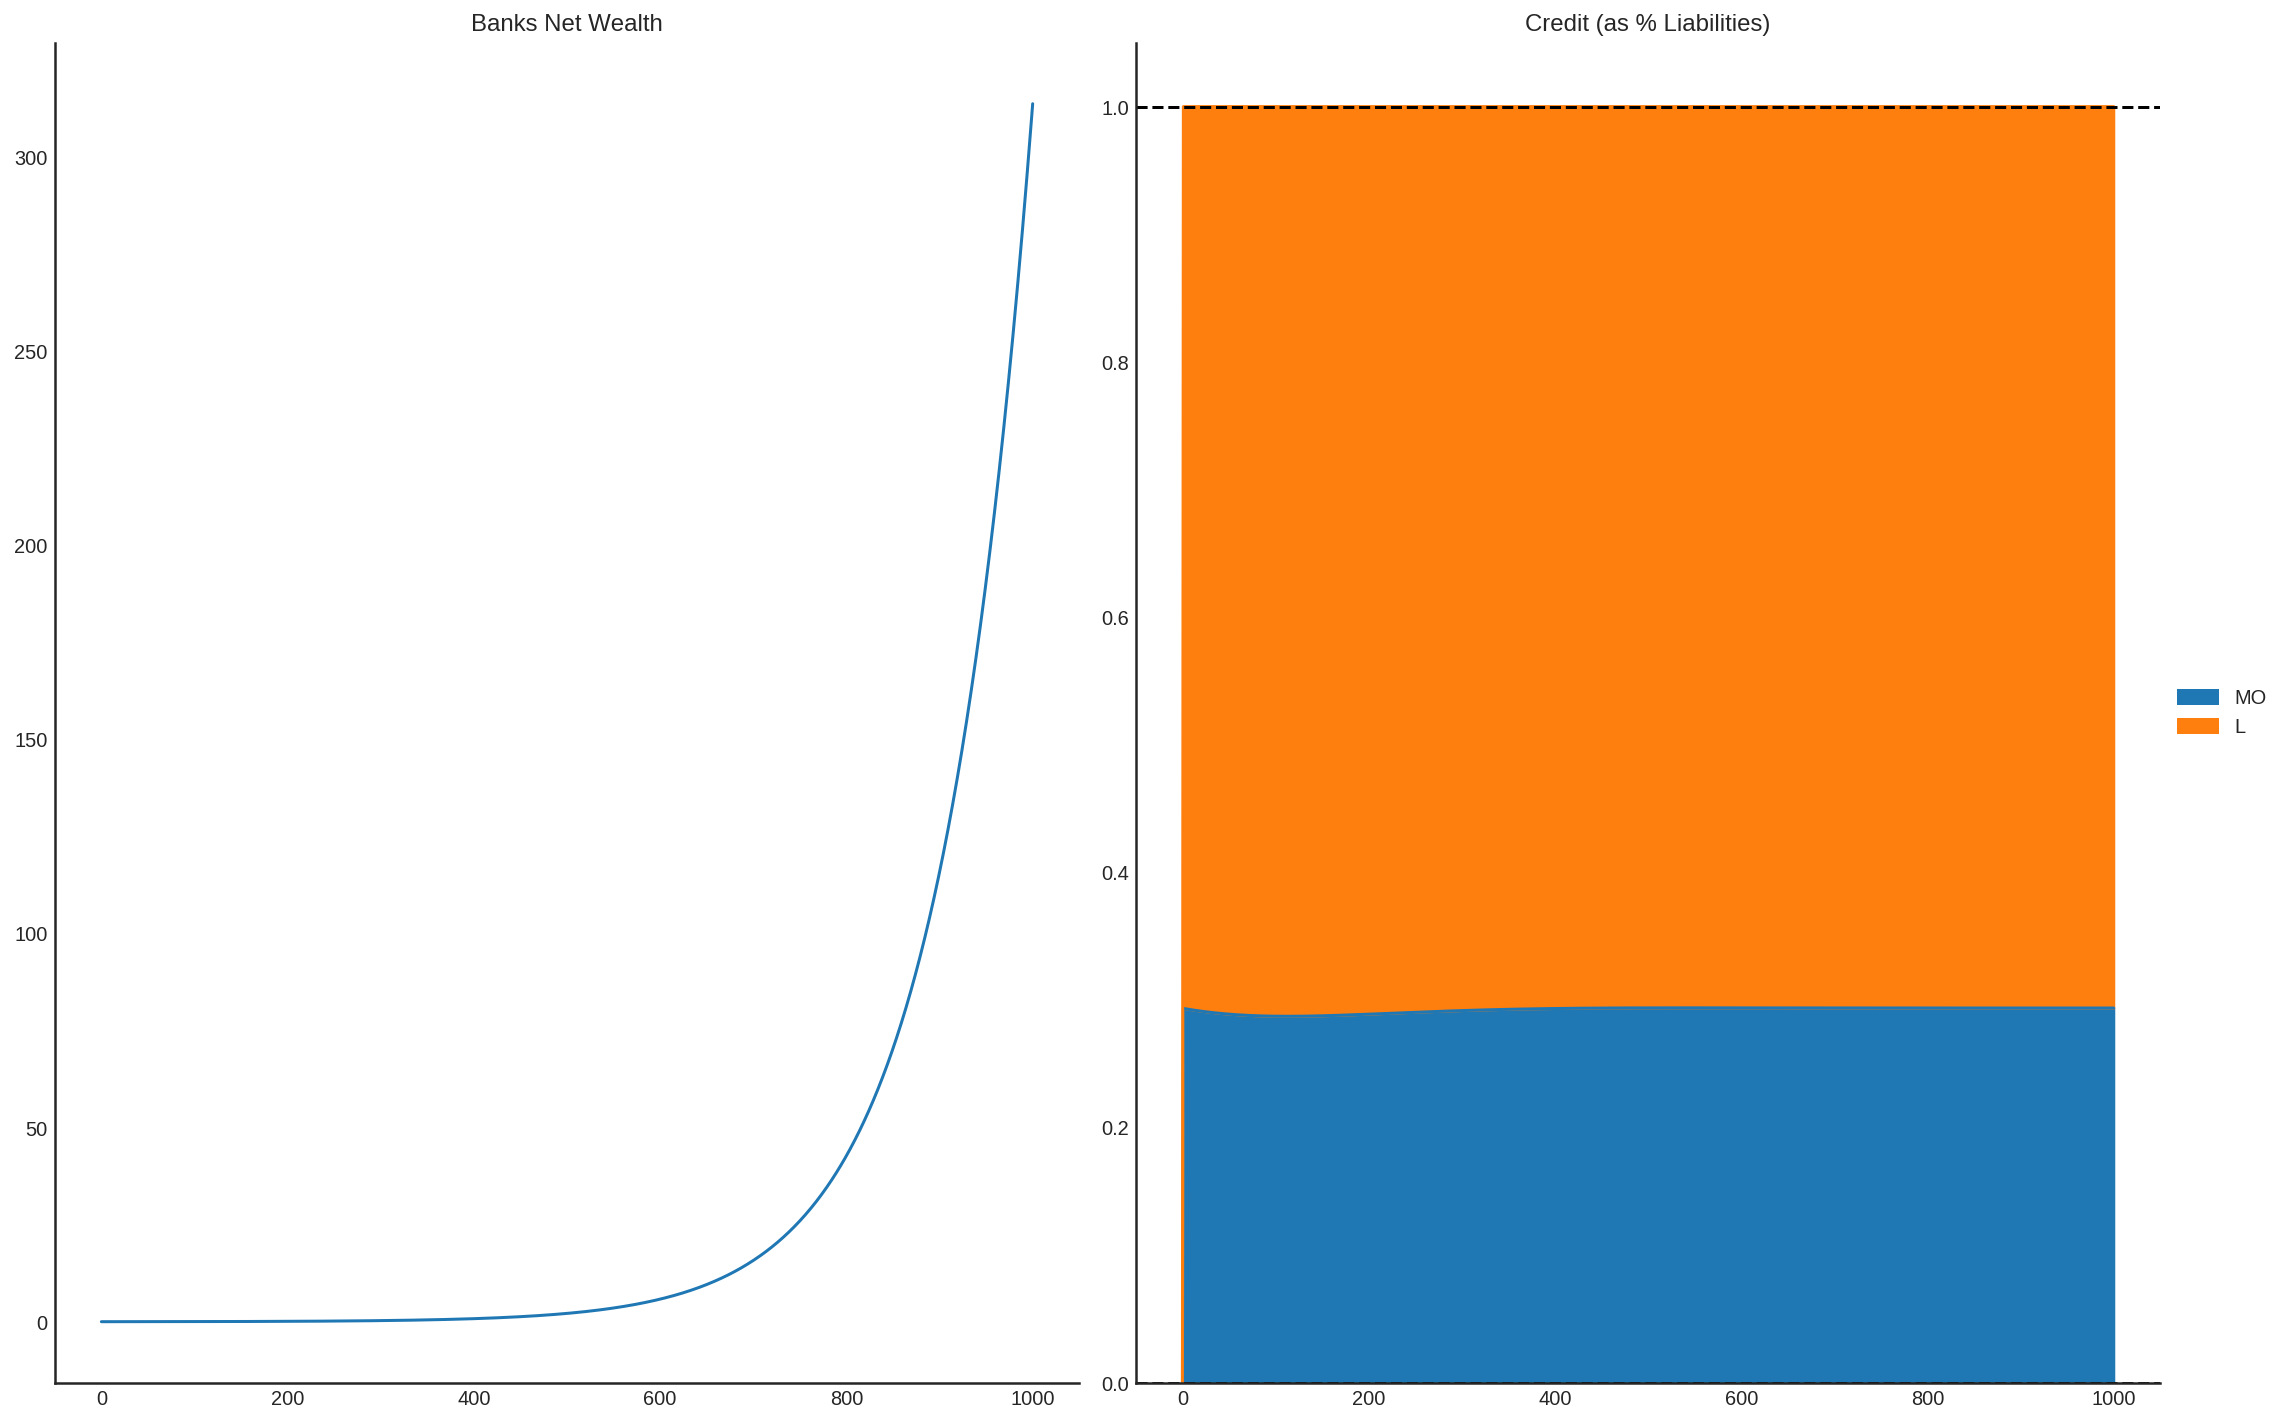

0           1           2           3           4           5     \
C       0.000000  489.588029  499.104970  508.800957  518.679333  528.743520   
Cw    112.000000  251.821402  256.820783  261.913371  267.100882  272.385079   
Ck     68.000000  237.766660  242.284225  246.887625  251.578490  256.358481   
FD      0.000000  347.513535  354.340488  361.291911  368.370113  375.577469   
Fn      0.000000  377.732103  385.152705  392.708599  400.402297  408.236379   
...          ...         ...         ...         ...         ...         ...   
TIME    1.000000    2.000000    3.000000    4.000000    5.000000    6.000000   
Ih/Y    0.357143    0.161861    0.161725    0.161594    0.161466    0.161342   
I/Y     0.357143    0.222325    0.222641    0.222948    0.223246    0.223535   
Z/Y     0.000000    0.539536    0.539085    0.538646    0.538220    0.537807   
gY           NaN    1.248405    0.019853    0.019829    0.019806    0.019784   

            6           7           8           9     ...          991   \
C     538.997011  549.443361  560.086199  570.929264  ...  6.050963e+10   
Cw    277.767759  283.250755  288.835933  294.525228  ...  3.109298e+10   
Ck    261.229293  266.192649  271.250309  276.404068  ...  2.941664e+10   
FD    382.916397  390.389367  397.998895  405.747588  ...  4.246108e+10   
Fn    416.213475  424.336269  432.607495  441.029987  ...  4.615335e+10   
...          ...         ...         ...         ...  ...           ...   
TIME    7.000000    8.000000    9.000000   10.000000  ...  9.920000e+02   
Ih/Y    0.161222    0.161105    0.160991    0.160881  ...  1.621862e-01   
I/Y     0.223816    0.224089    0.224354    0.224611  ...  2.215655e-01   
Z/Y     0.537405    0.537016    0.536637    0.536270  ...  5.406208e-01   
gY      0.019761    0.019739    0.019718    0.019697  ...  1.899989e-02   

              992           993           994           995           996   \
C     6.165931e+10  6.283083e+10  6.402461e+10  6.524108e+10  6.648065e+10   
Cw    3.168374e+10  3.228573e+10  3.289916e+10  3.352424e+10  3.416120e+10   
Ck    2.997556e+10  3.054510e+10  3.112545e+10  3.171684e+10  3.231946e+10   
FD    4.326784e+10  4.408992e+10  4.492763e+10  4.578125e+10  4.665109e+10   
Fn    4.703026e+10  4.792383e+10  4.883438e+10  4.976223e+10  5.070771e+10   
...            ...           ...           ...           ...           ...   
TIME  9.930000e+02  9.940000e+02  9.950000e+02  9.960000e+02  9.970000e+02   
Ih/Y  1.621862e-01  1.621863e-01  1.621863e-01  1.621863e-01  1.621863e-01   
I/Y   2.215654e-01  2.215654e-01  2.215653e-01  2.215653e-01  2.215653e-01   
Z/Y   5.406208e-01  5.406209e-01  5.406209e-01  5.406210e-01  5.406210e-01   
gY    1.899989e-02  1.899989e-02  1.899989e-02  1.899989e-02  1.899989e-02   

              997           998           999           1000  
C     6.774378e+10  6.903091e+10  7.034249e+10  7.167900e+10  
Cw    3.481025e+10  3.547165e+10  3.614560e+10  3.683237e+10  
Ck    3.293353e+10  3.355926e+10  3.419689e+10  3.484663e+10  
FD    4.753746e+10  4.844067e+10  4.936104e+10  5.029889e+10  
Fn    5.167115e+10  5.265290e+10  5.365330e+10  5.467271e+10  
...            ...           ...           ...           ...  
TIME  9.980000e+02  9.990000e+02  1.000000e+03  1.001000e+03  
Ih/Y  1.621863e-01  1.621863e-01  1.621864e-01  1.621864e-01  
I/Y   2.215652e-01  2.215652e-01  2.215652e-01  2.215651e-01  
Z/Y   5.406211e-01  5.406212e-01  5.406212e-01  5.406213e-01  
gY    1.899989e-02  1.899990e-02  1.899990e-02  1.899990e-02  

[77 rows x 1001 columns]

In [4]:
base = model()
df = SolveSFC(base, time=1000)

fig, ax = plt.subplots(1,3, figsize=(24,5))

df["TIME"] = [i+1 for i in range(len(df.index))]
df["Ih/Y"] = df["I_h"]/df["Y"]
df["I/Y"] = df["I_t"]/df["Y"]
df["Z/Y"] = df["Z"]/df["Y"]
df["gY"] = df["Y"].pct_change()

sns.scatterplot(y = 'Ih/Y', x='u', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False, ax=ax[0])
sns.lineplot(y = 'Ih/Y', x='u', data=df, sort=False, color = 'black', ax=ax[0])

sns.scatterplot(y = 'Z/Y', x='u', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False, ax=ax[1])
sns.lineplot(y = 'Z/Y', x='u', data=df, sort=False, color = 'black', ax=ax[1])

sns.scatterplot(y = 'I/Y', x='gY', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False, ax=ax[2])
sns.lineplot(y = 'I/Y', x='gY', data=df, sort=False, color = 'black', ax=ax[2])

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2,2, figsize=(16,10))

df[['Lf', "M_h", "MO", "Lk"]][:100].plot(ax=ax[0,0], title='Financial Assets')

df[['FT', "FU", "FD", "Fn"]][:100].plot(title='Profitss', ax=ax[0,1])

df['h'].plot(color = "black", ls="-",  title = "Marginal propensity to invest", 
             label = "$h_t$", legend = True,ax=ax[1,0])

df[["Y", "K", "I_h", "I_f"]][40:].pct_change().plot(title = "Growth rates",ax=ax[1,1])
ax[1,1].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,1].get_yticks()])
ax[1,1].axhline(y=df["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout()
plt.show()


fig, ax = plt.subplots(2,2, figsize=(16,10))


df[["K"]].pct_change().plot(ax=ax[0,0], color='black', title='Capital growth rate')

df['Y'].pct_change().plot(color = "black", title = "GDP growth rate", label = "$Y_t$", legend = True, ax=ax[0,1])
ax[0,1].axhline(y=df["g_Z"].iloc[-1], color = "red", ls = "--", lw=1, label = "Autonomous growth rate")
ax[0,1].set_yticklabels(['{:,.2%}'.format(x) for x in ax[0,1].get_yticks()])

df['K_k'].plot(color = "black", title = "Housing as % of total capital", label = "$k$", legend = True, ax=ax[1,0])
ax[1,0].set_yticklabels(['{:,.0%}'.format(x) for x in ax[1,0].get_yticks()])

df['un'].plot(color = "red", ls="--",  title = "Capacity utilization ratio", label = "$un$", legend = True,ax=ax[1,1])
df['u'].plot(color = "black", title = "Capacity utilization ratio", label = "$u_t$", legend = True, ax=ax[1,1])
#ax[1,1].set_yticklabels(['{:,.1%}'.format(x) for x in ax[1,1].get_yticks()])

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2,2, figsize=(16,10))

df[["V_b", "V_h", "V_f"]].plot(title = "Net Wealth", ax=ax[0,0])

df[['V_b', 'V_h', 'V_f']].apply(lambda x: np.abs(x)/df['K']).plot(kind = 'area', stacked = True, 
                                                                  title = "Net wealth (as % K)", ax=ax[0,1])
ax[0,1].set_yticklabels(['{:,.0%}'.format(x) for x in ax[0,1].get_yticks()])
ax[0,1].axhline(y=1, color = "black", ls = "--", lw=1)
ax[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

((df['V_b'] + df['V_f'] + df['V_h'])/df['K']).plot(label='Consistensy check', color='black', ax=ax[1,0])
ax[1,0].axhline(y=1, color = "black", ls = "--", lw=1)

df[["NFW_b", "NFW_h", "NFW_f"]].plot(title = "Net Financial Wealth", ax=ax[1,1])

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1,2, figsize=(16,10))

df['V_b'].plot(title = "Banks Net Wealth", ax=ax[0])
df[["MO", "L"]].apply(lambda x: x/(df["MO"] + df['L'])).plot(kind = "area",stacked = True ,
                                                             title = "Credit (as % Liabilities)", ax=ax[1])
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].axhline(y = 1, color = "black", ls = "--")
ax[1].axhline(y = 0, color = "black", ls = "--")

sns.despine()
plt.tight_layout()
plt.show()

df.transpose()

# Shocks

## Increase in autonomous growth rate ($g_z$)

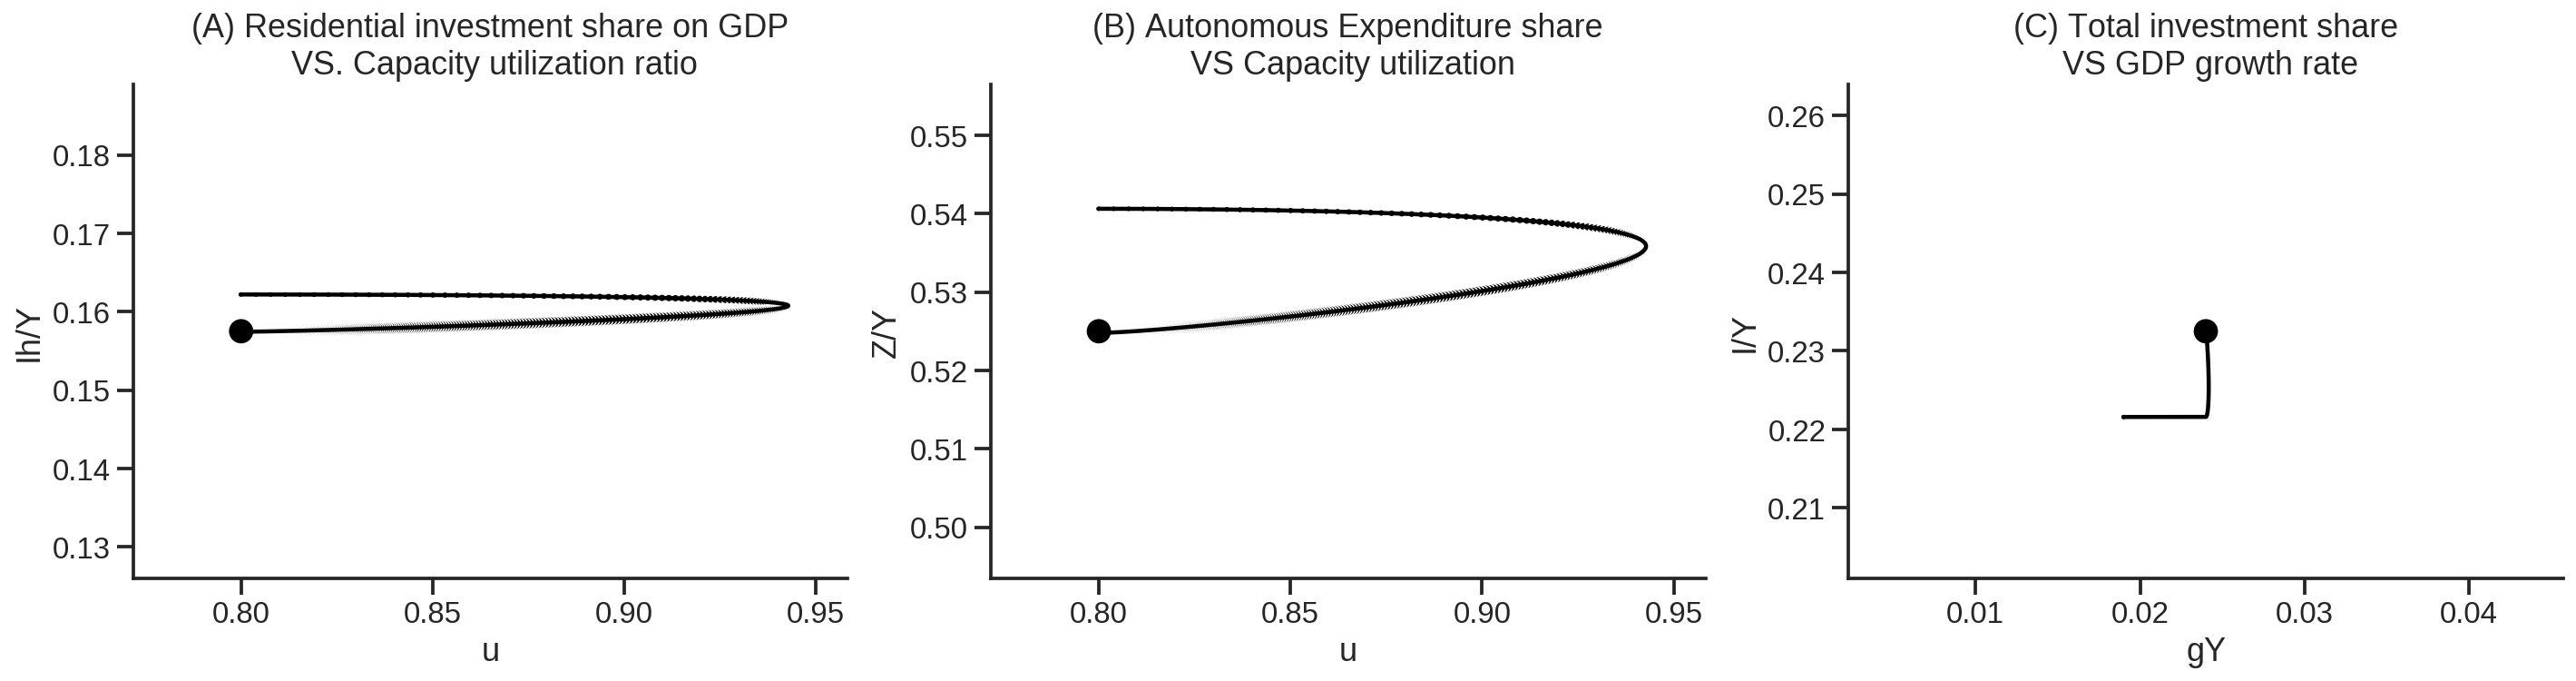

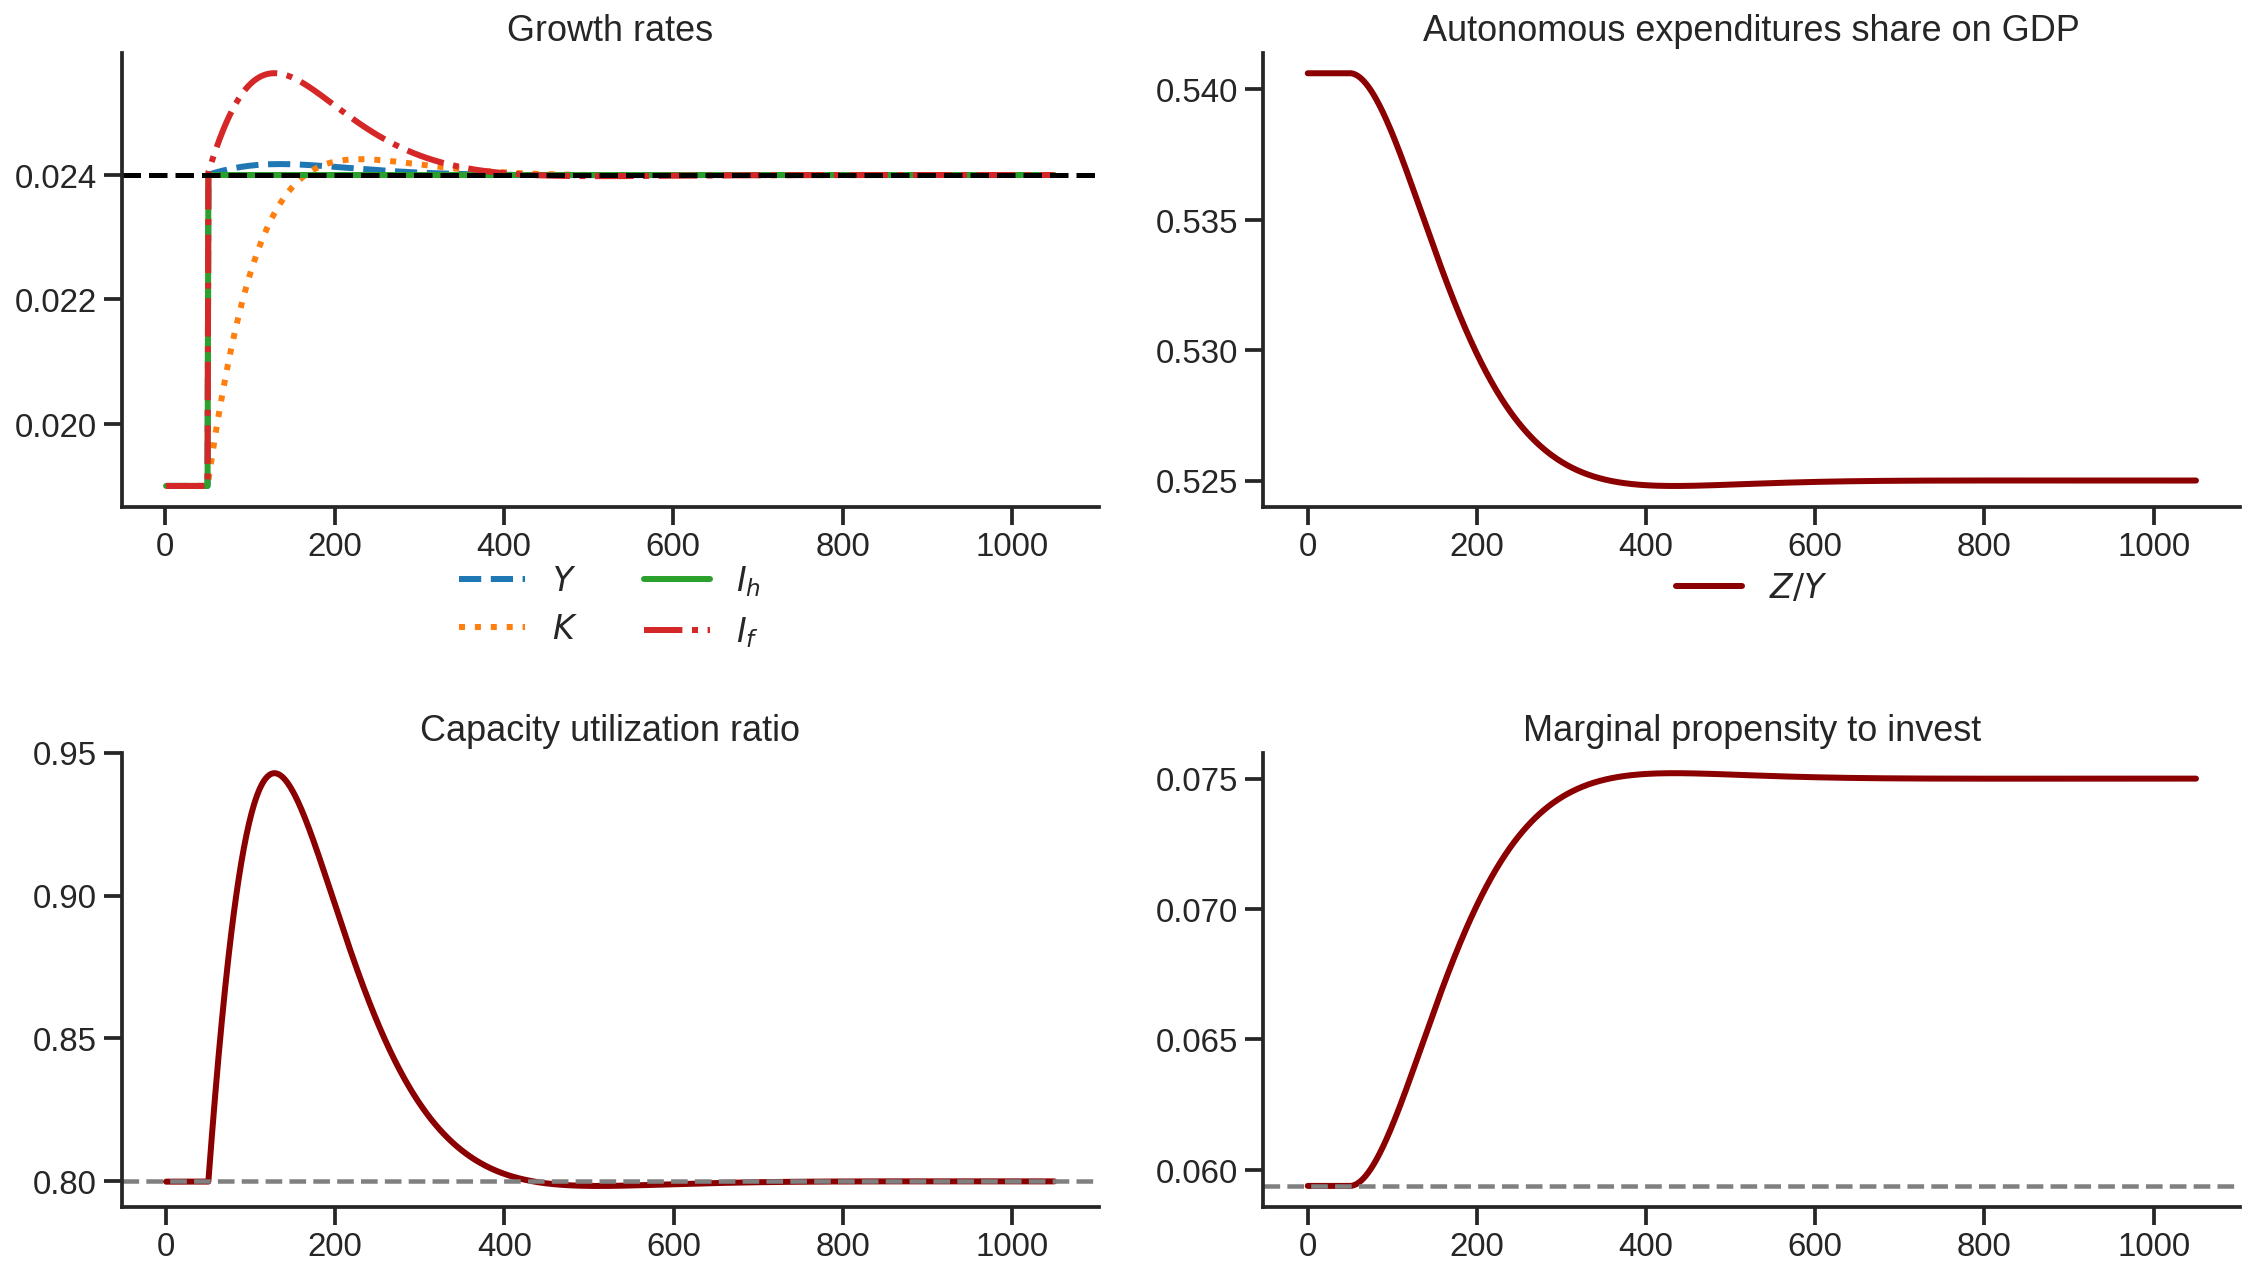

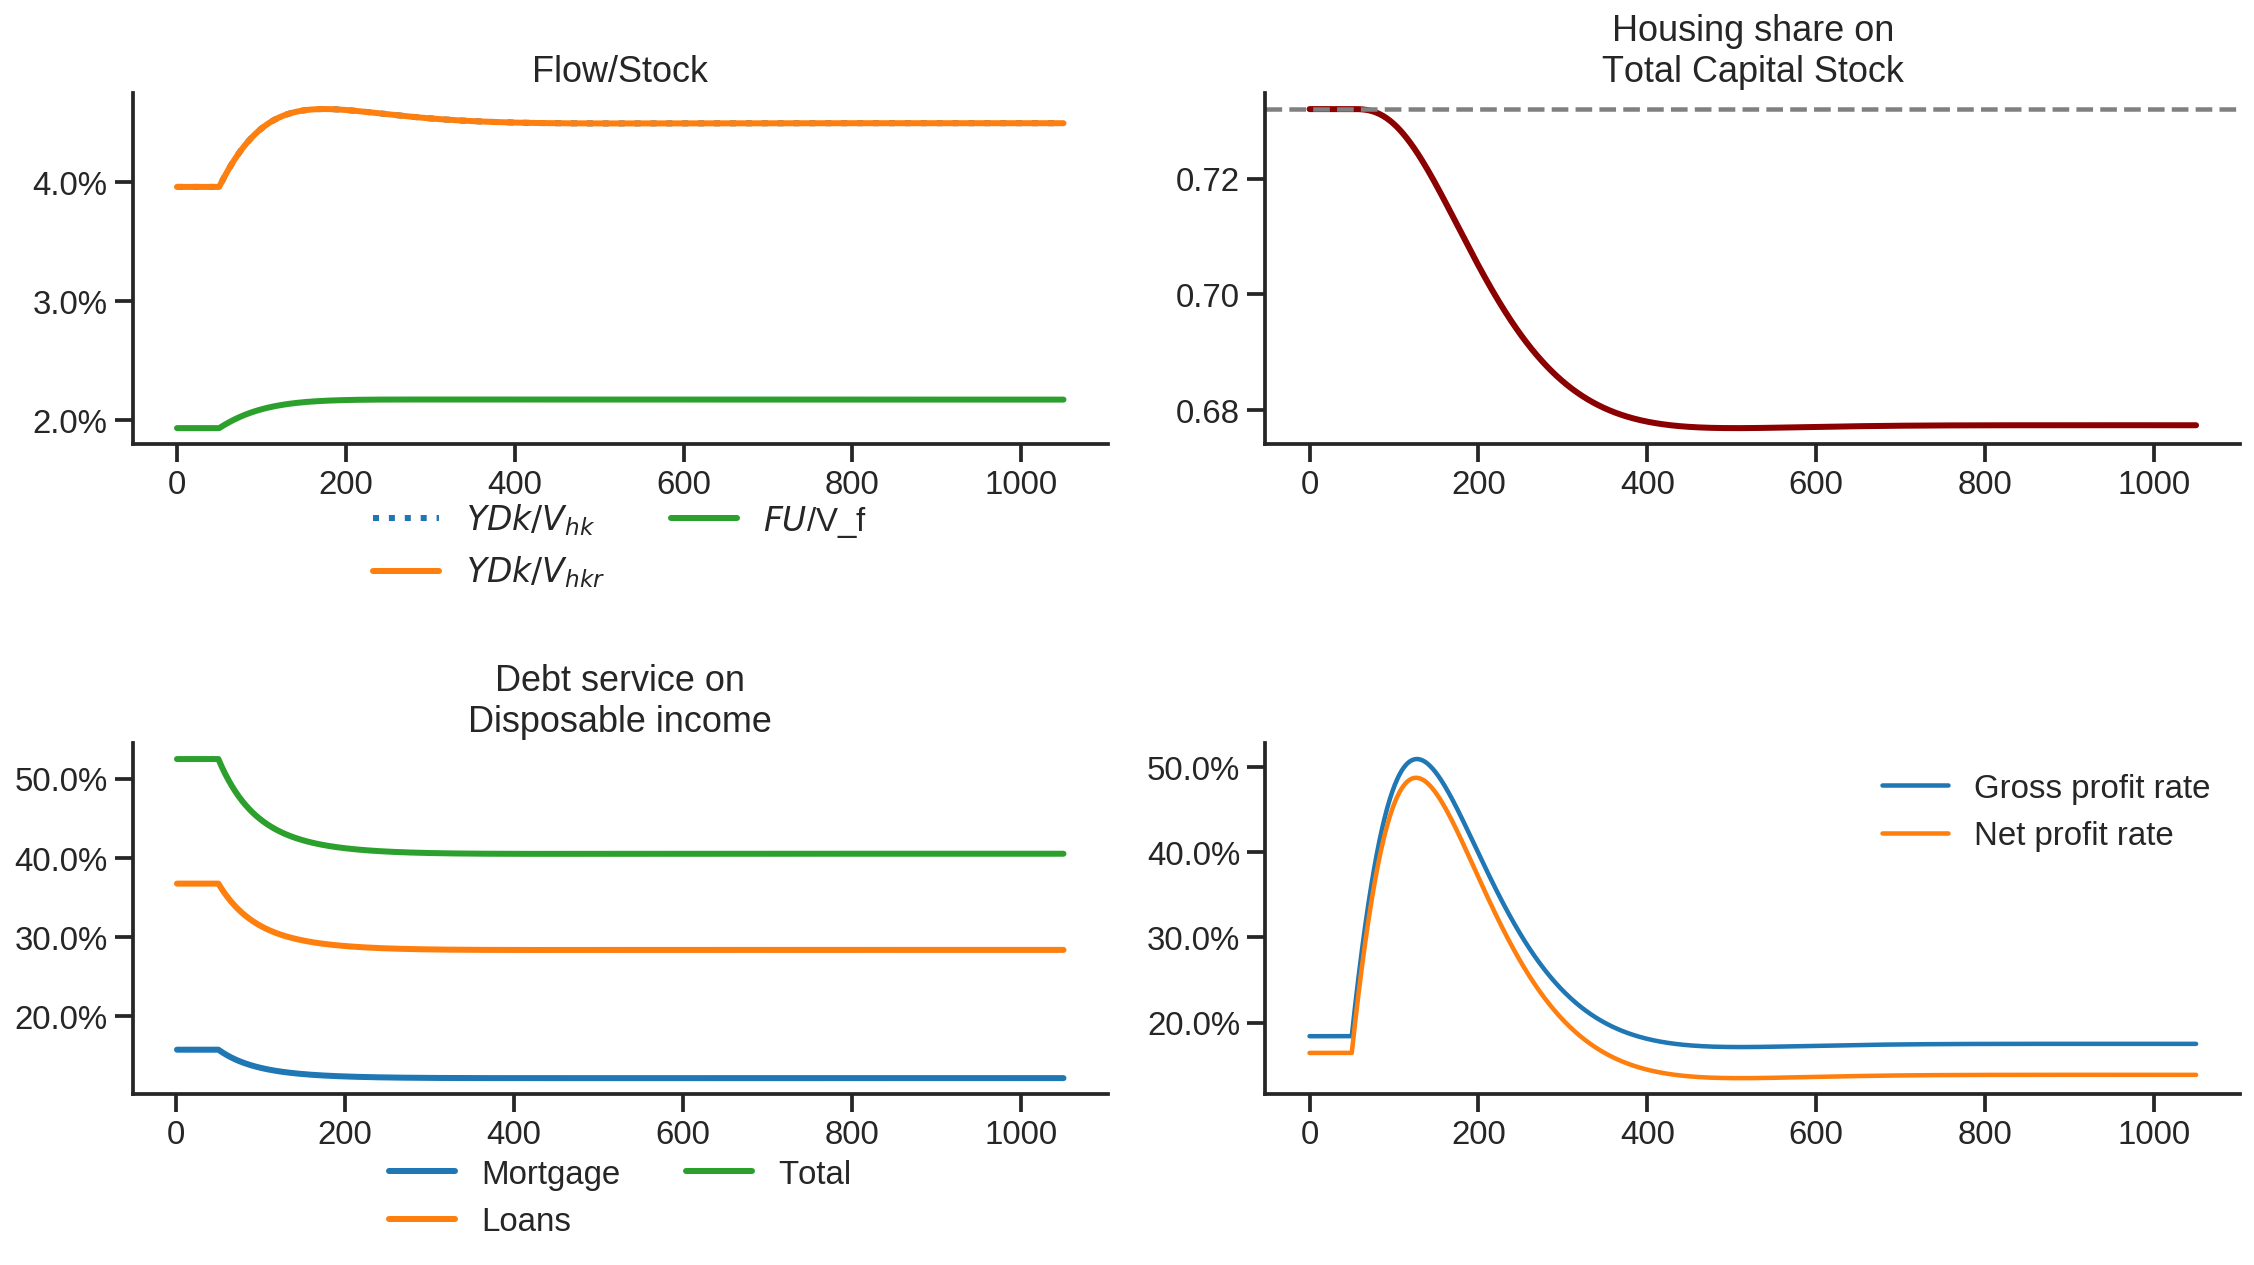

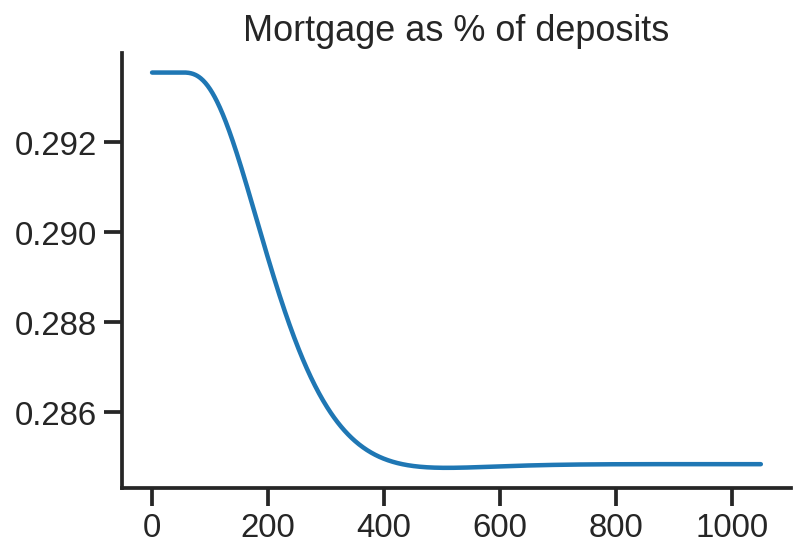

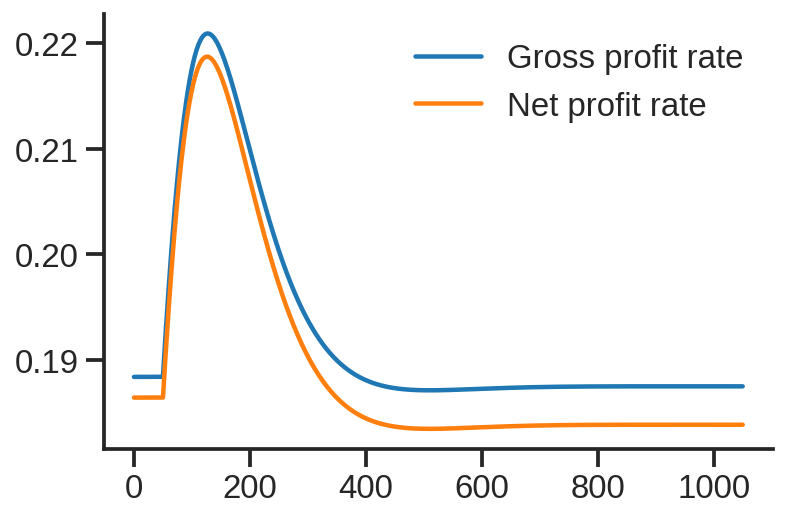

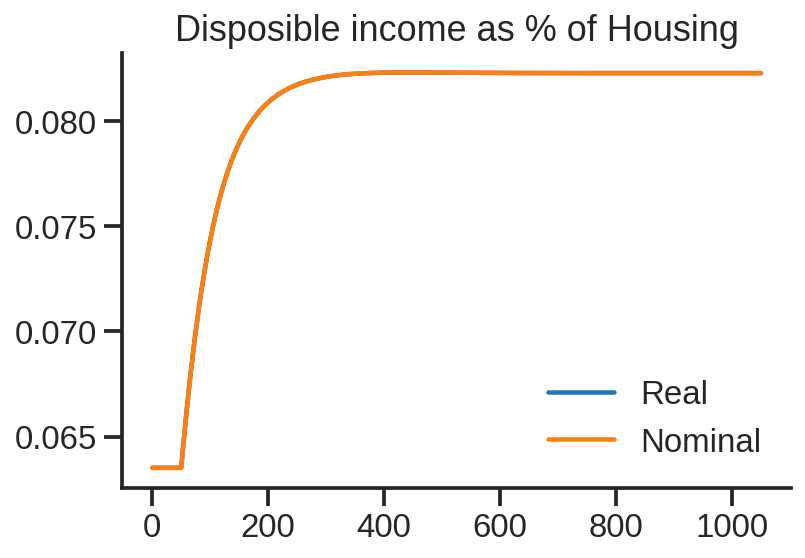

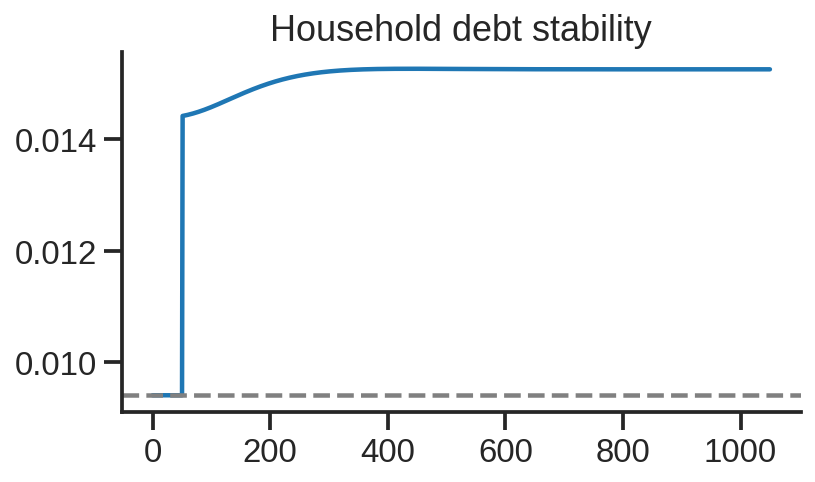

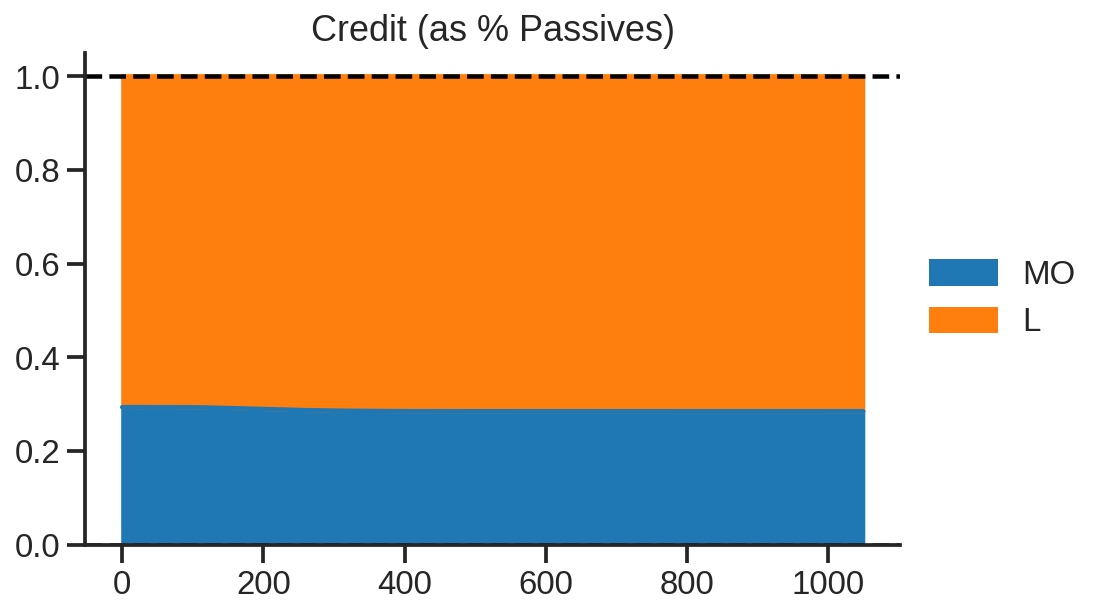

0         Shock             1             2             3  \
C     1.836962e+11  1.881053e+11  1.926207e+11  1.972449e+11  2.019805e+11   
Cw    9.439240e+10  9.665823e+10  9.897887e+10  1.013557e+11  1.037899e+11   
Ck    8.930381e+10  9.144710e+10  9.364183e+10  9.588924e+10  9.819058e+10   
FD    1.289041e+11  1.320052e+11  1.351813e+11  1.384342e+11  1.417658e+11   
Fn    1.401132e+11  1.434839e+11  1.469362e+11  1.504719e+11  1.540933e+11   
...            ...           ...           ...           ...           ...   
TIME  5.100000e+01  5.200000e+01  5.300000e+01  5.400000e+01  5.500000e+01   
Ih/Y  1.621870e-01  1.621864e-01  1.621850e-01  1.621829e-01  1.621802e-01   
I/Y   2.215636e-01  2.215652e-01  2.215684e-01  2.215732e-01  2.215796e-01   
Z/Y   5.406235e-01  5.406212e-01  5.406166e-01  5.406097e-01  5.406006e-01   
gY    1.899994e-02  2.400435e-02  2.400872e-02  2.401302e-02  2.401726e-02   

               t-1             t    difference  
C     3.633688e+21  3.720896e+21  8.720852e+19  
Cw    1.893778e+21  1.939229e+21  4.545069e+19  
Ck    1.739910e+21  1.781667e+21  4.175783e+19  
FD    2.562724e+21  2.624229e+21  6.150538e+19  
Fn    2.785569e+21  2.852423e+21  6.685367e+19  
...            ...           ...           ...  
TIME  1.050000e+03  1.051000e+03  1.000000e+00  
Ih/Y  1.575001e-01  1.575001e-01 -1.418388e-09  
I/Y   2.324998e-01  2.324998e-01  3.309571e-09  
Z/Y   5.250003e-01  5.250002e-01 -4.727959e-09  
gY    2.400001e-02  2.400001e-02 -1.158260e-10  

[77 rows x 8 columns]

In [5]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='phi_0', increase=0.005, time = 1000)
clock_plots(shock = shock, filename = 'Clock_1.eps', variable='g_Z')
plot_shock(shock = shock, filename = 'Shock_1.eps', df=df)
plot_norms(shock = shock, filename = 'Shock_1Norms.eps', df=df)
other_plots(shock, df=df)

shock1 = shock.round(decimals = 5).tail(1).transpose().loc['alpha':,:]
shock1.columns = ['$\Delta \phi_0$']

summary = SummaryShock(shock)
summary

## Decrease in wage-share ($\omega$)

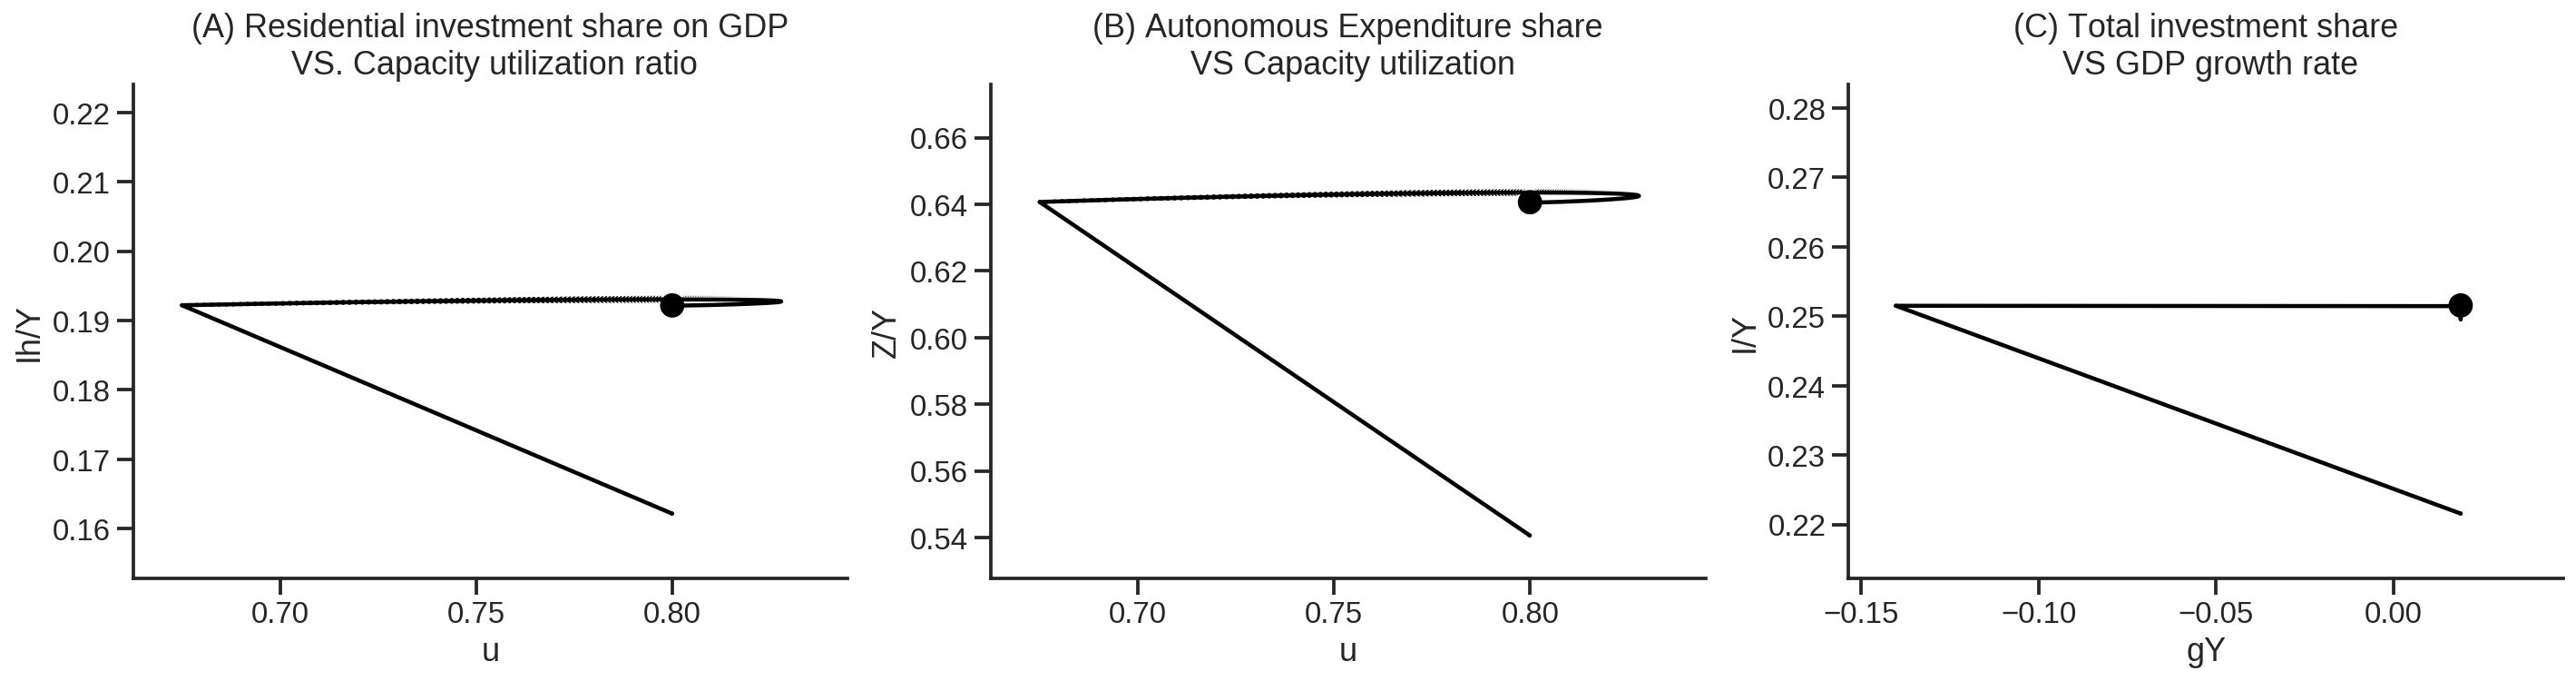

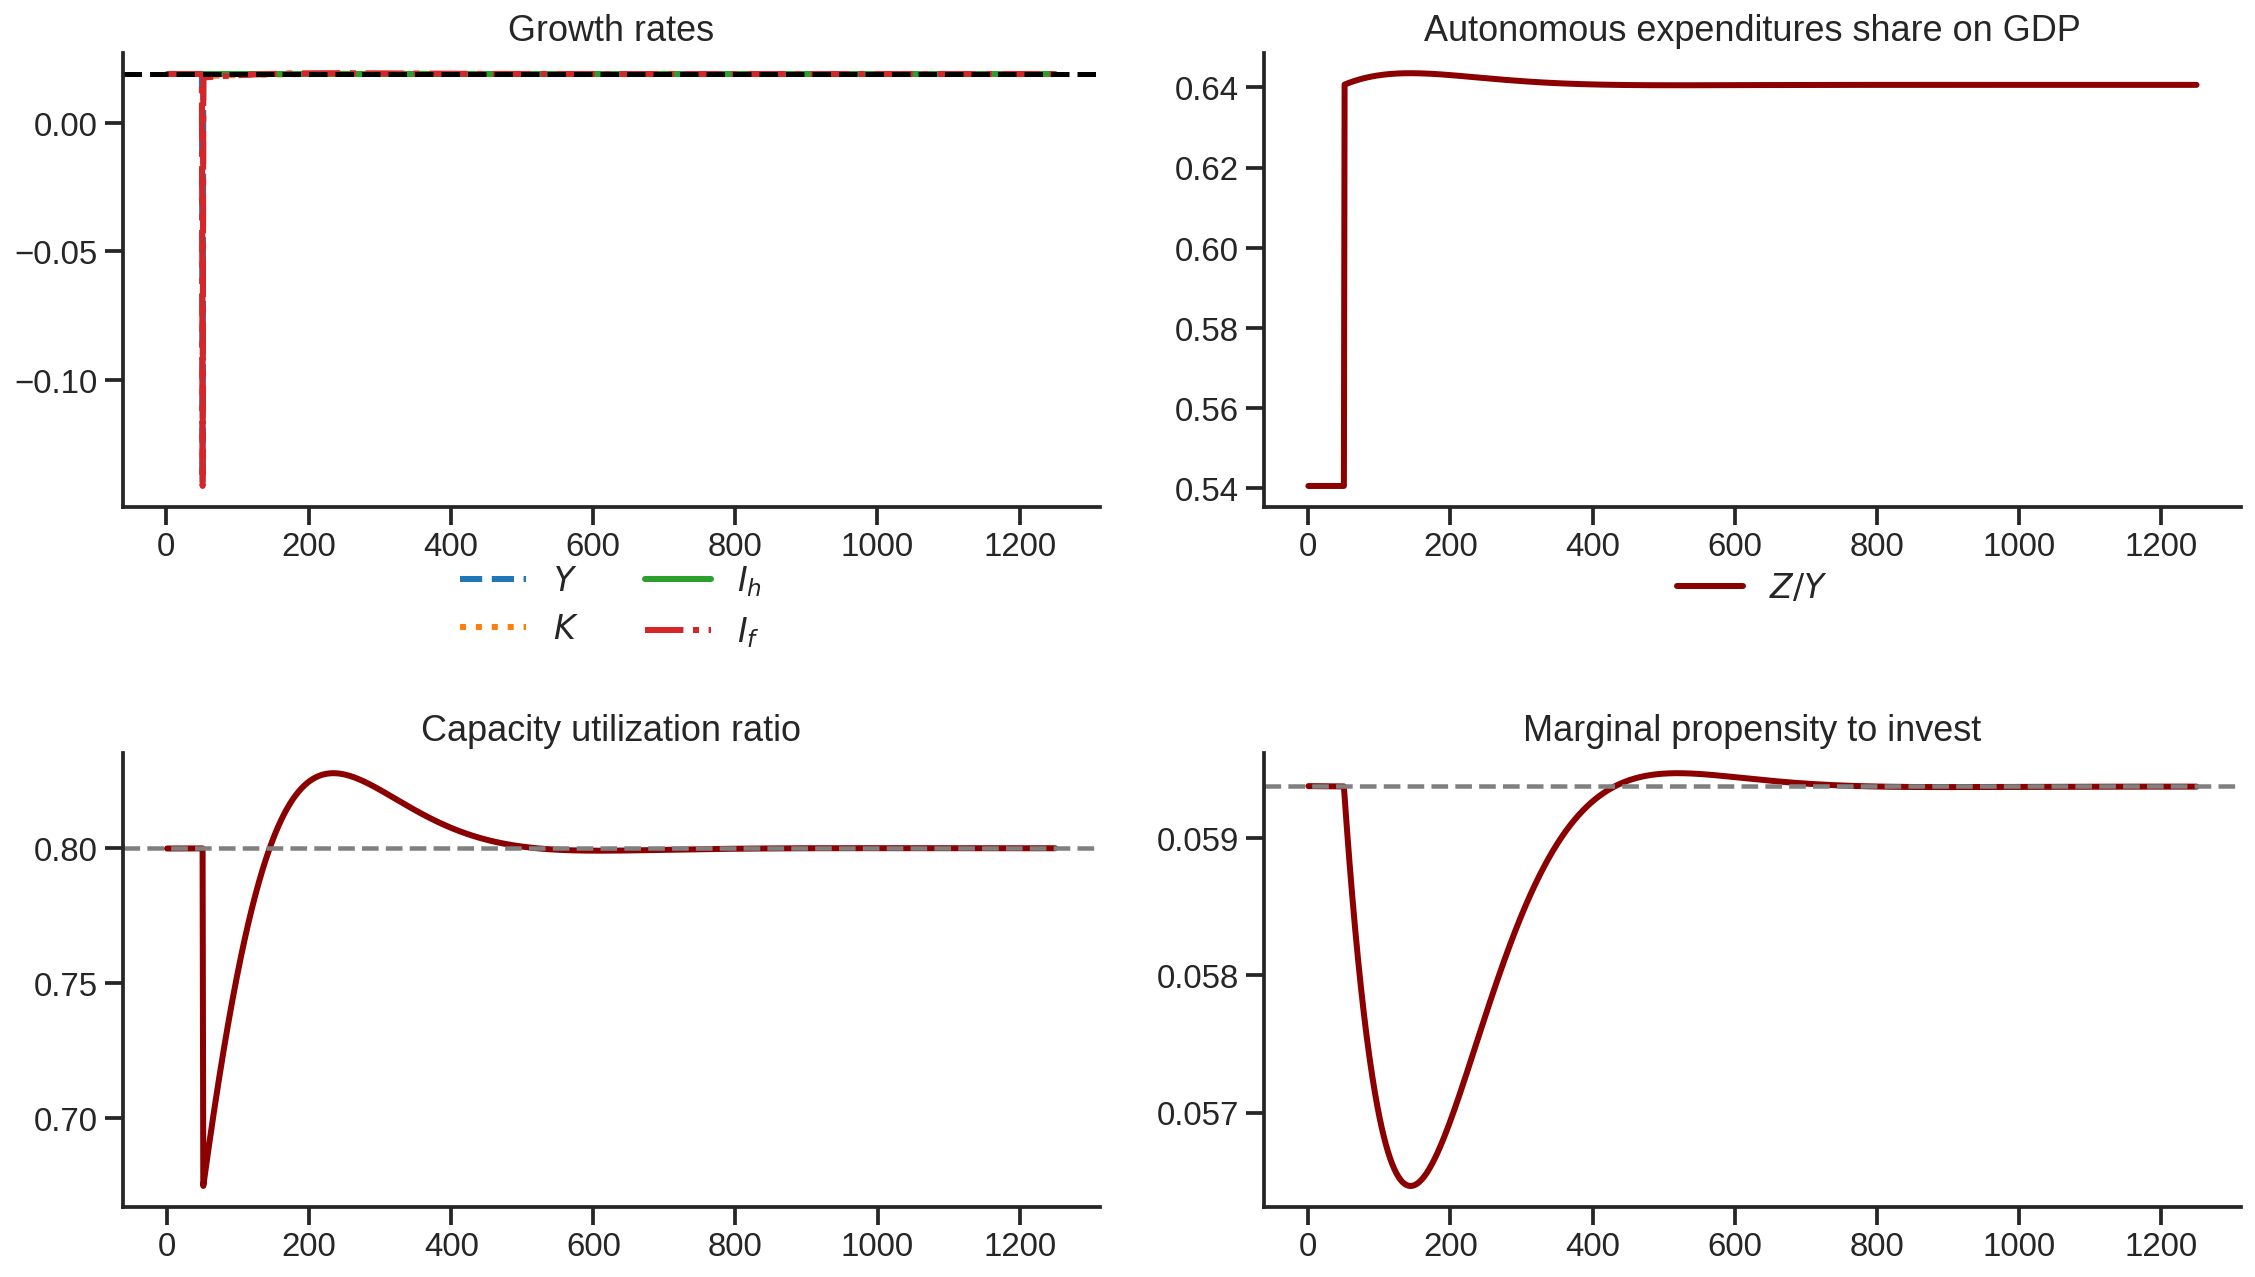

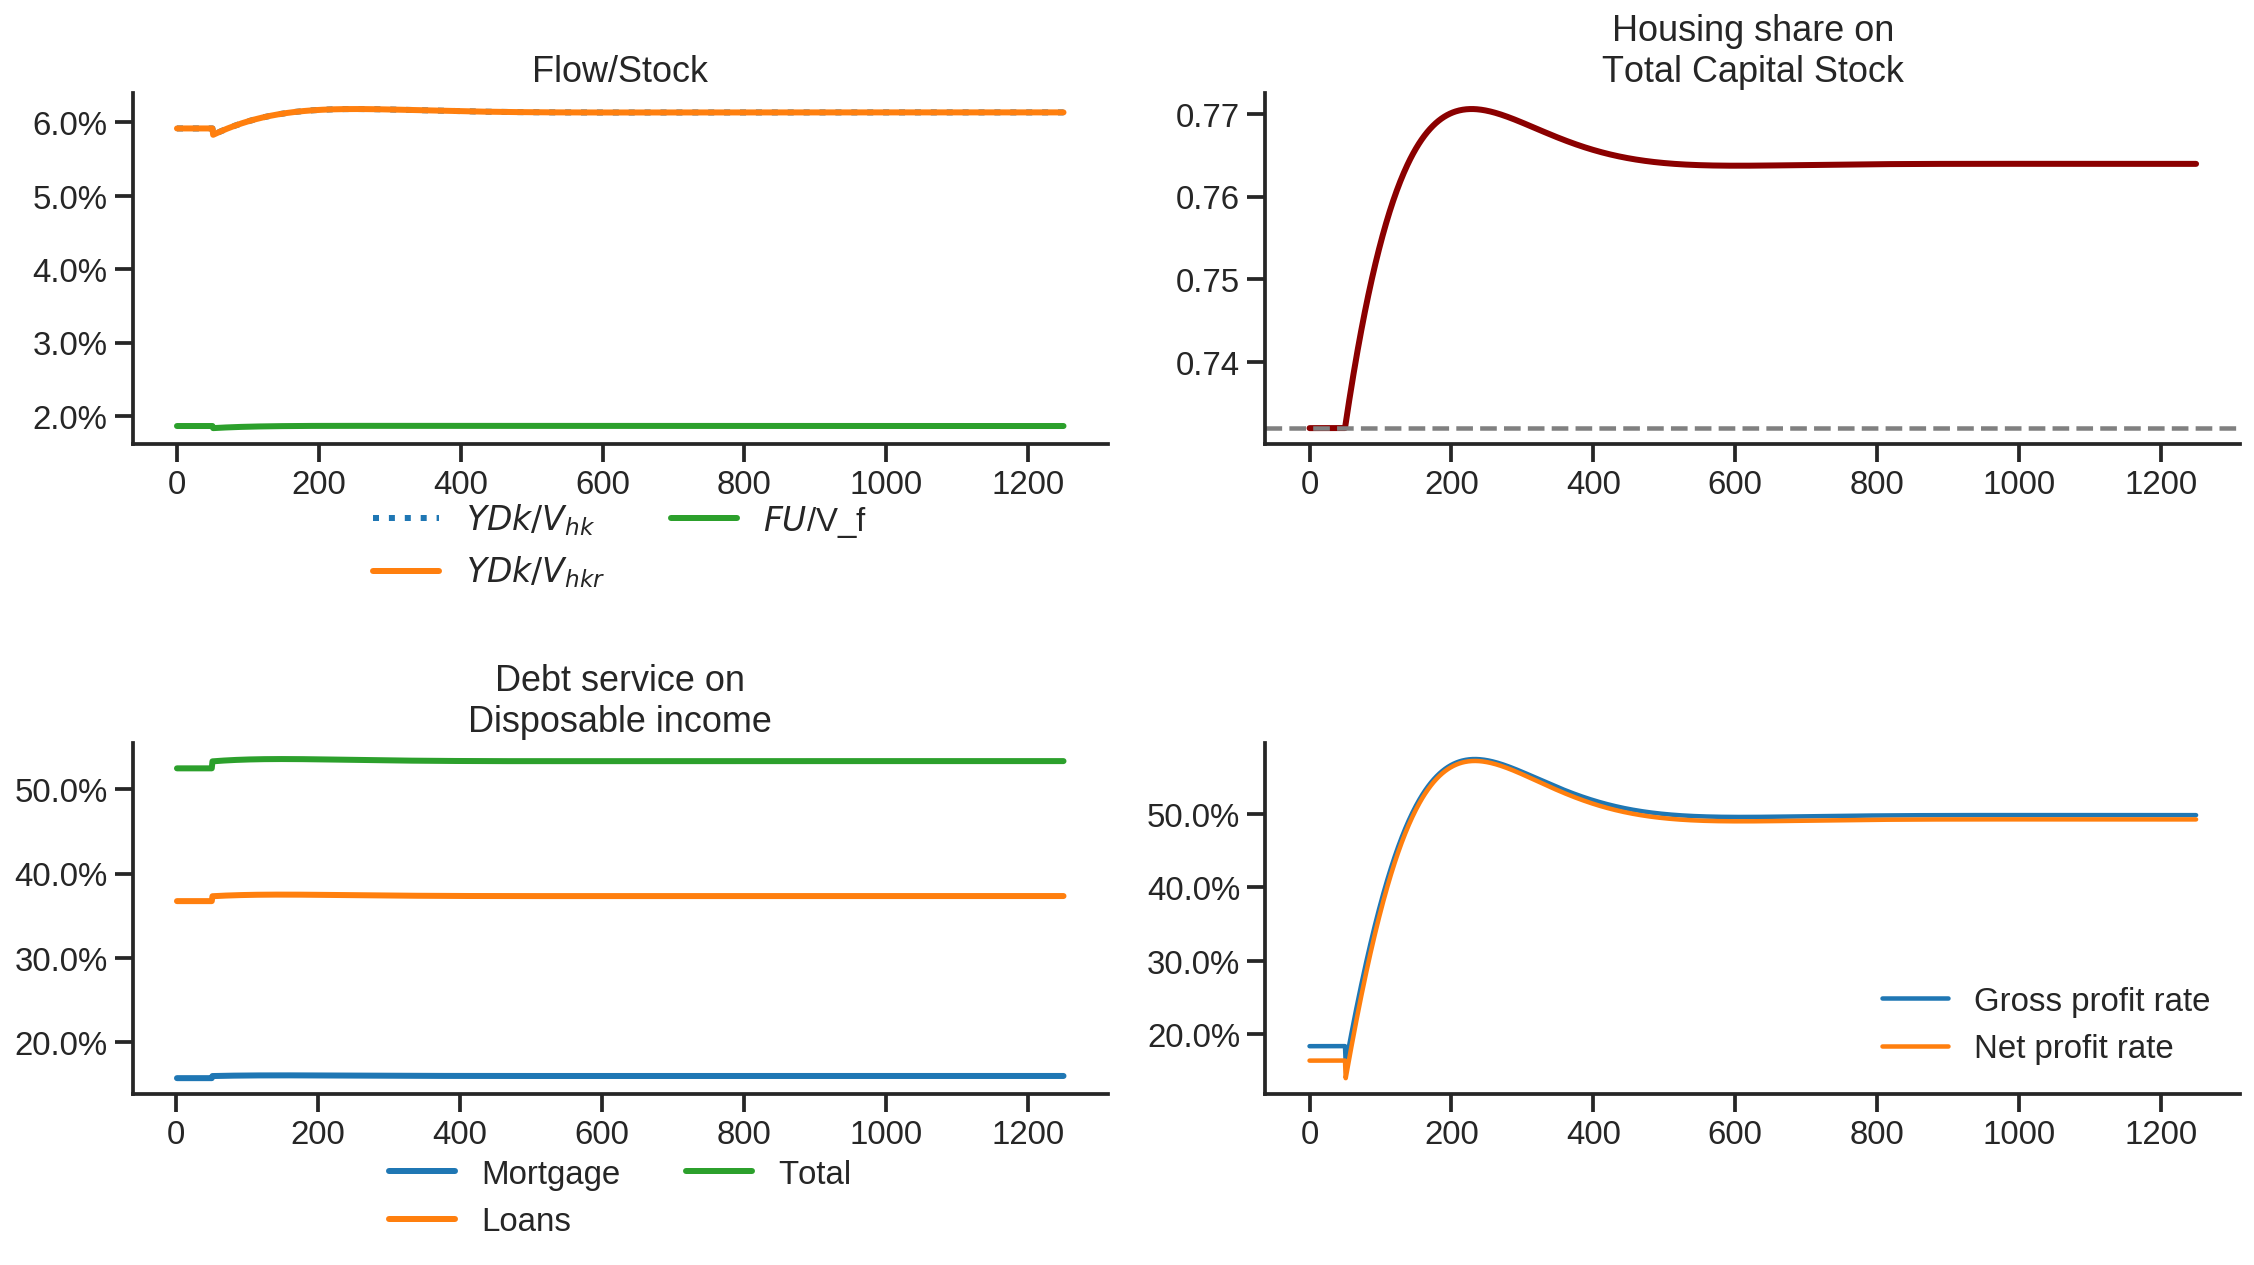

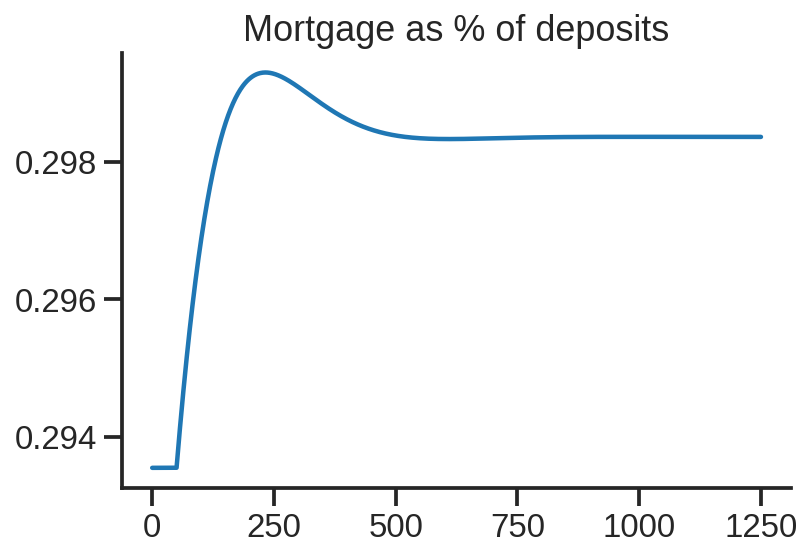

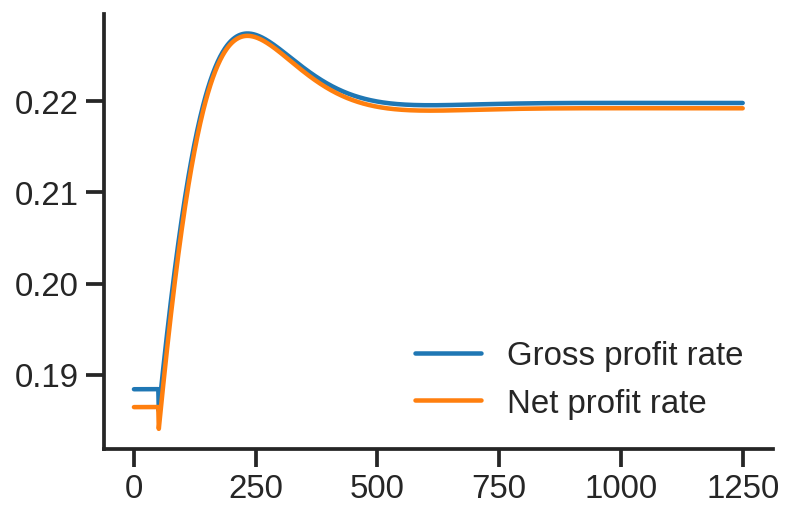

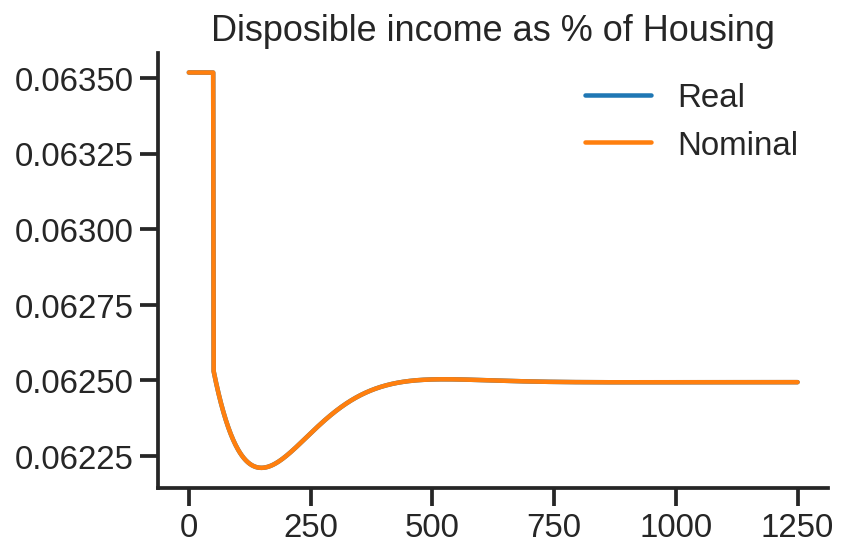

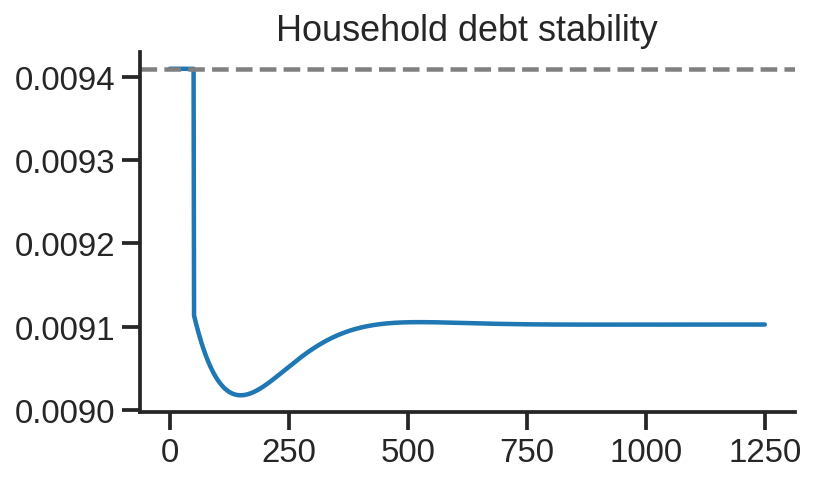

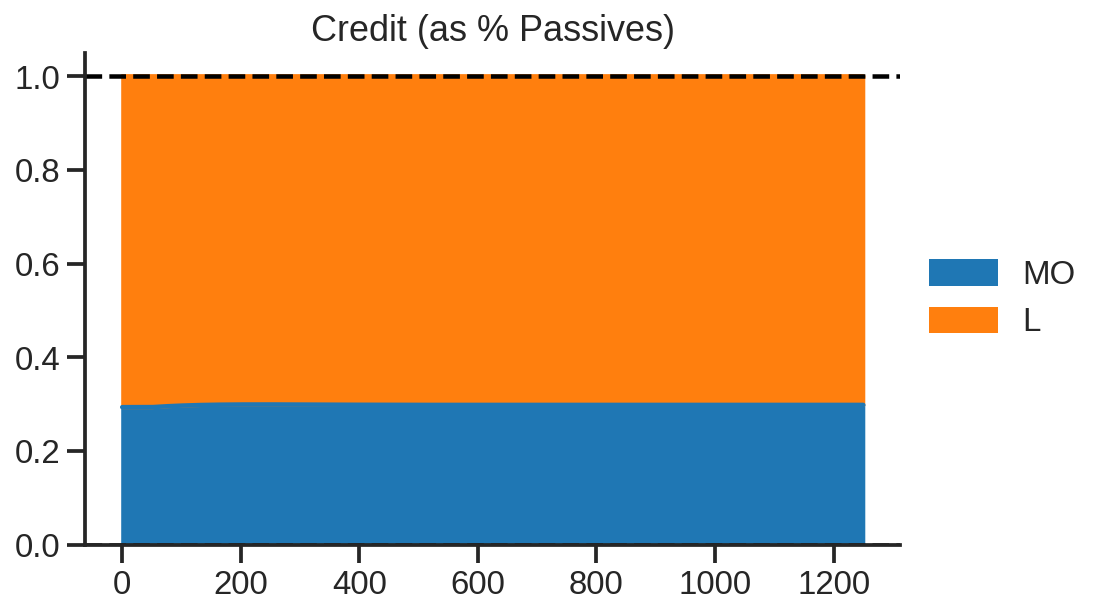

In [6]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='omega', increase=-0.1, time = 1200)
clock_plots(shock = shock, filename = 'Clock_2.eps', variable='omega')
plot_shock(shock = shock, filename = 'Shock_2.eps', df=df)
plot_norms(shock = shock, filename = 'Shock_2Norms.eps', df=df)
other_plots(shock, df)
shock2 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock2.columns = ['$\Delta \omega$']

## Increase in mortgage rates

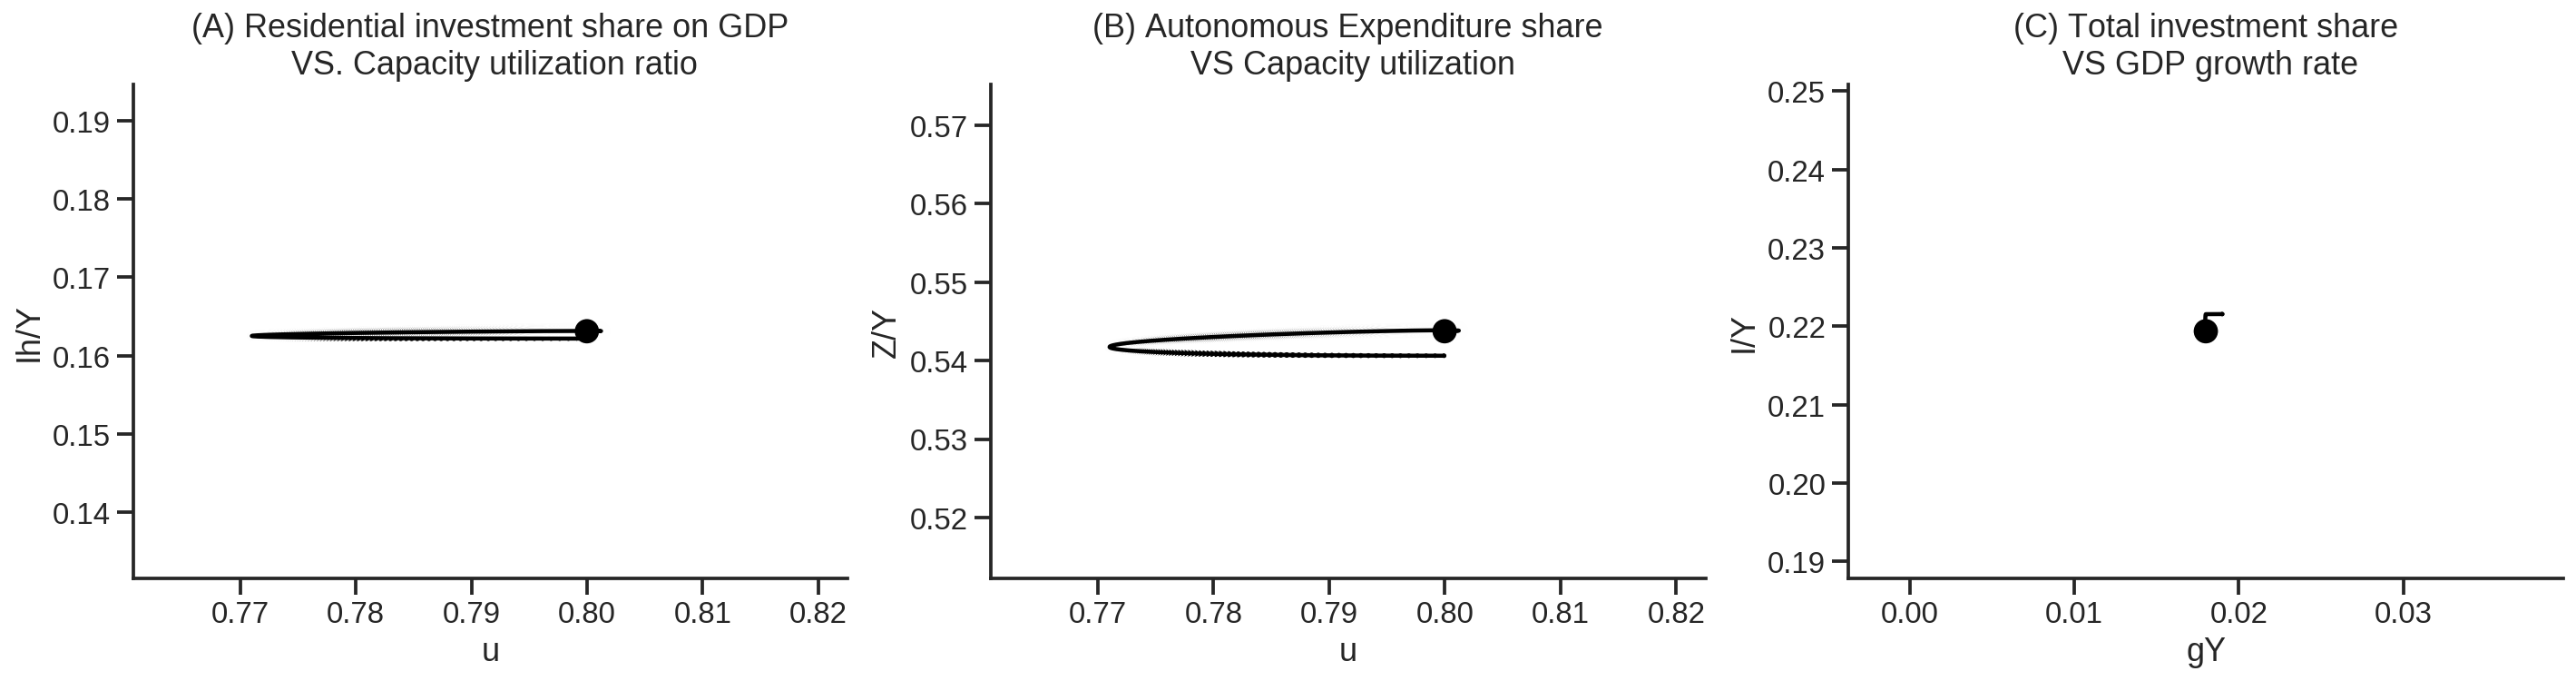

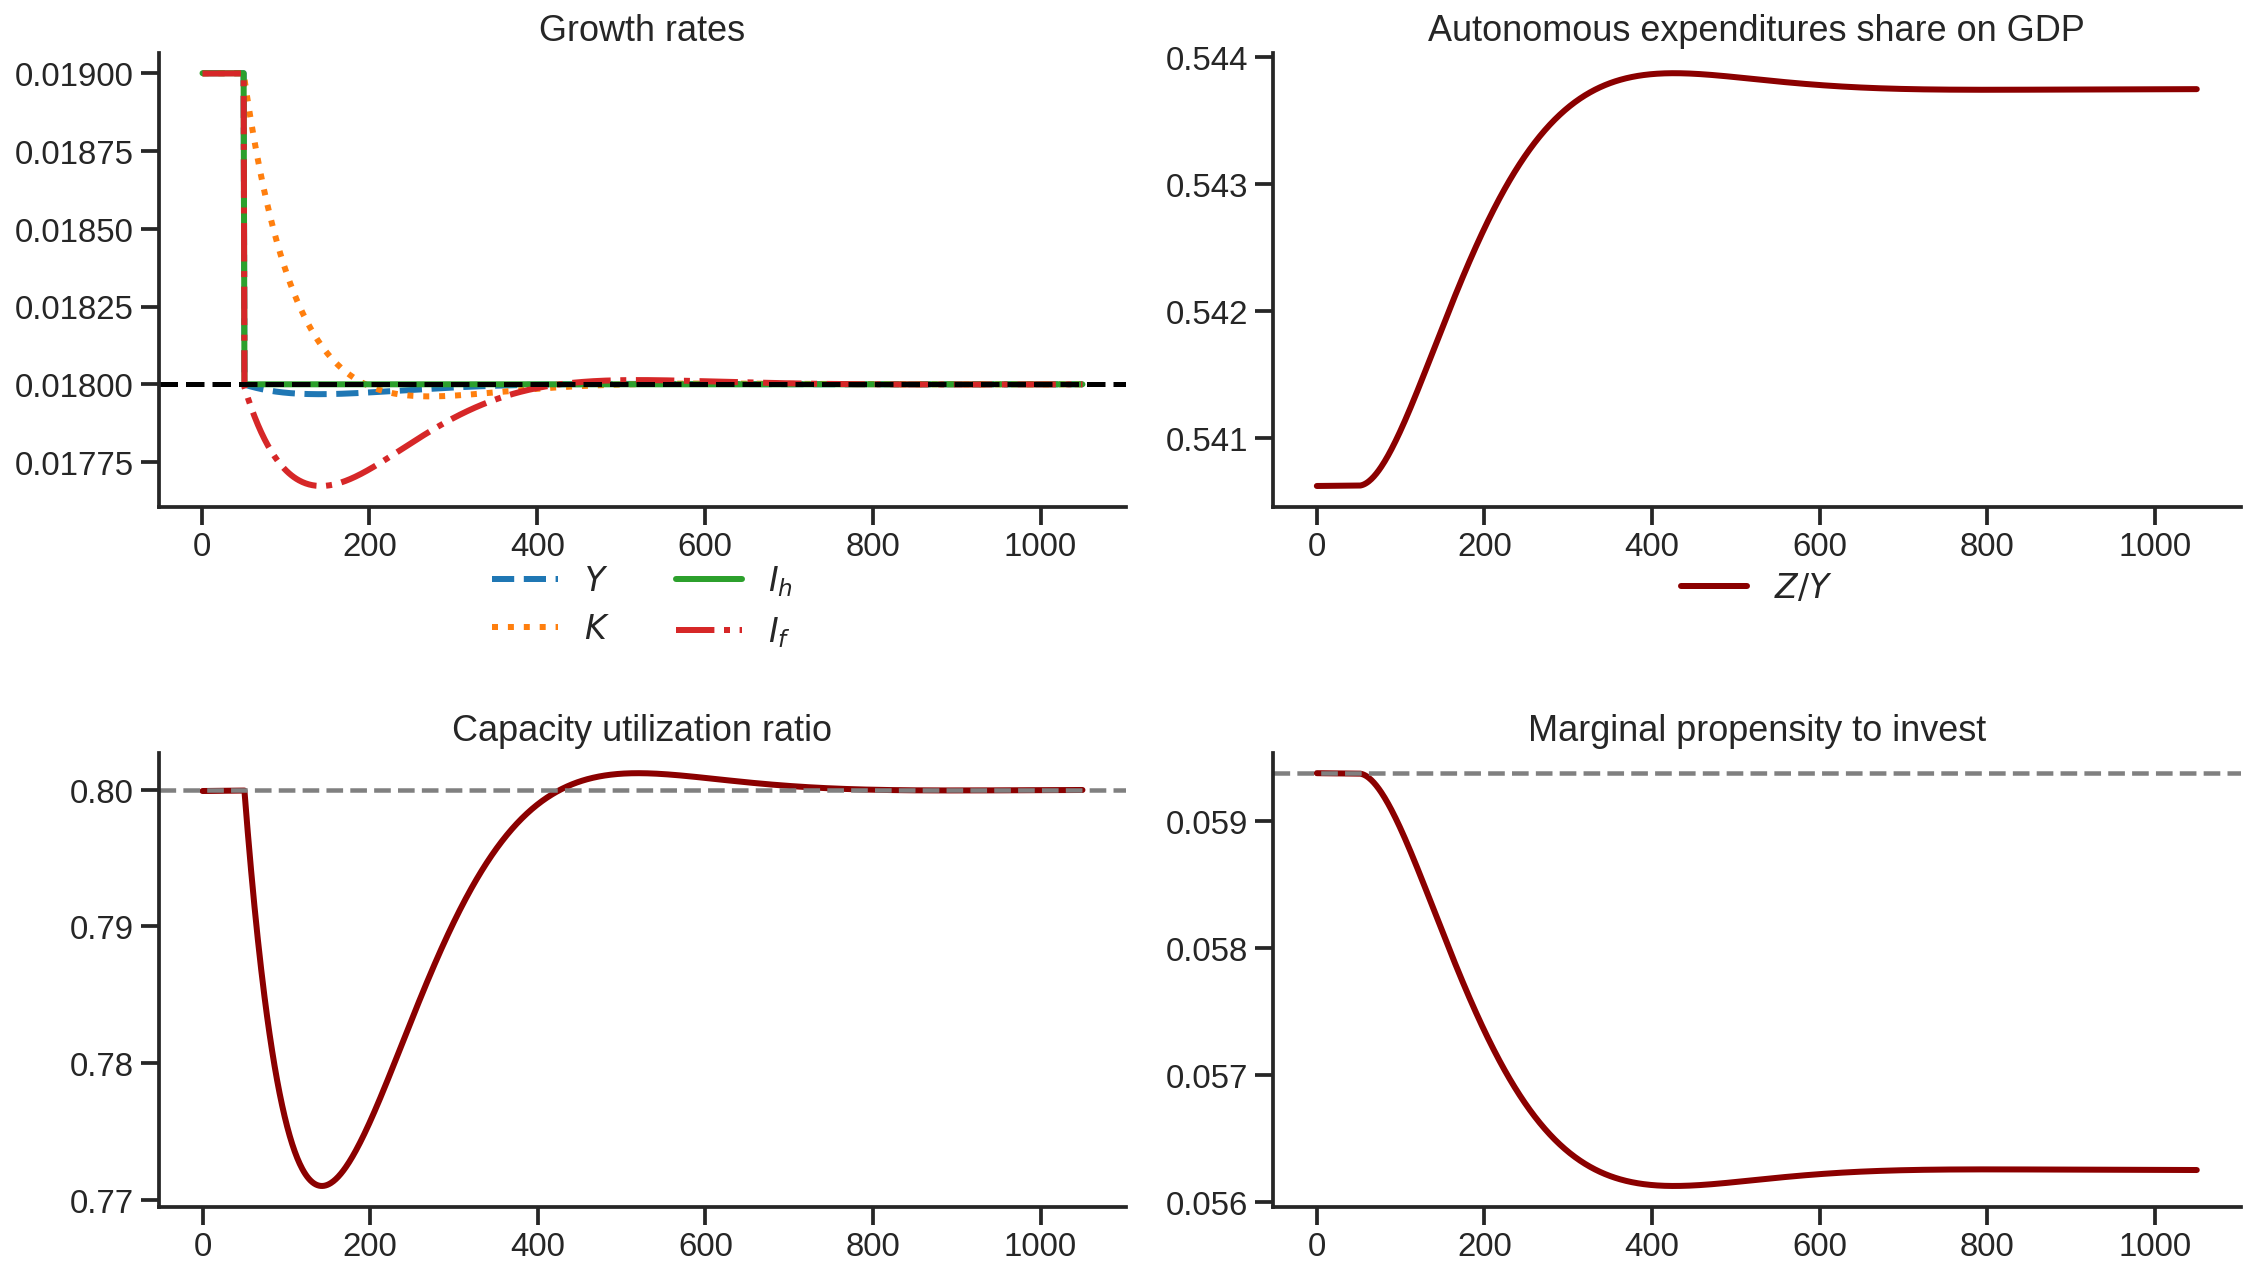

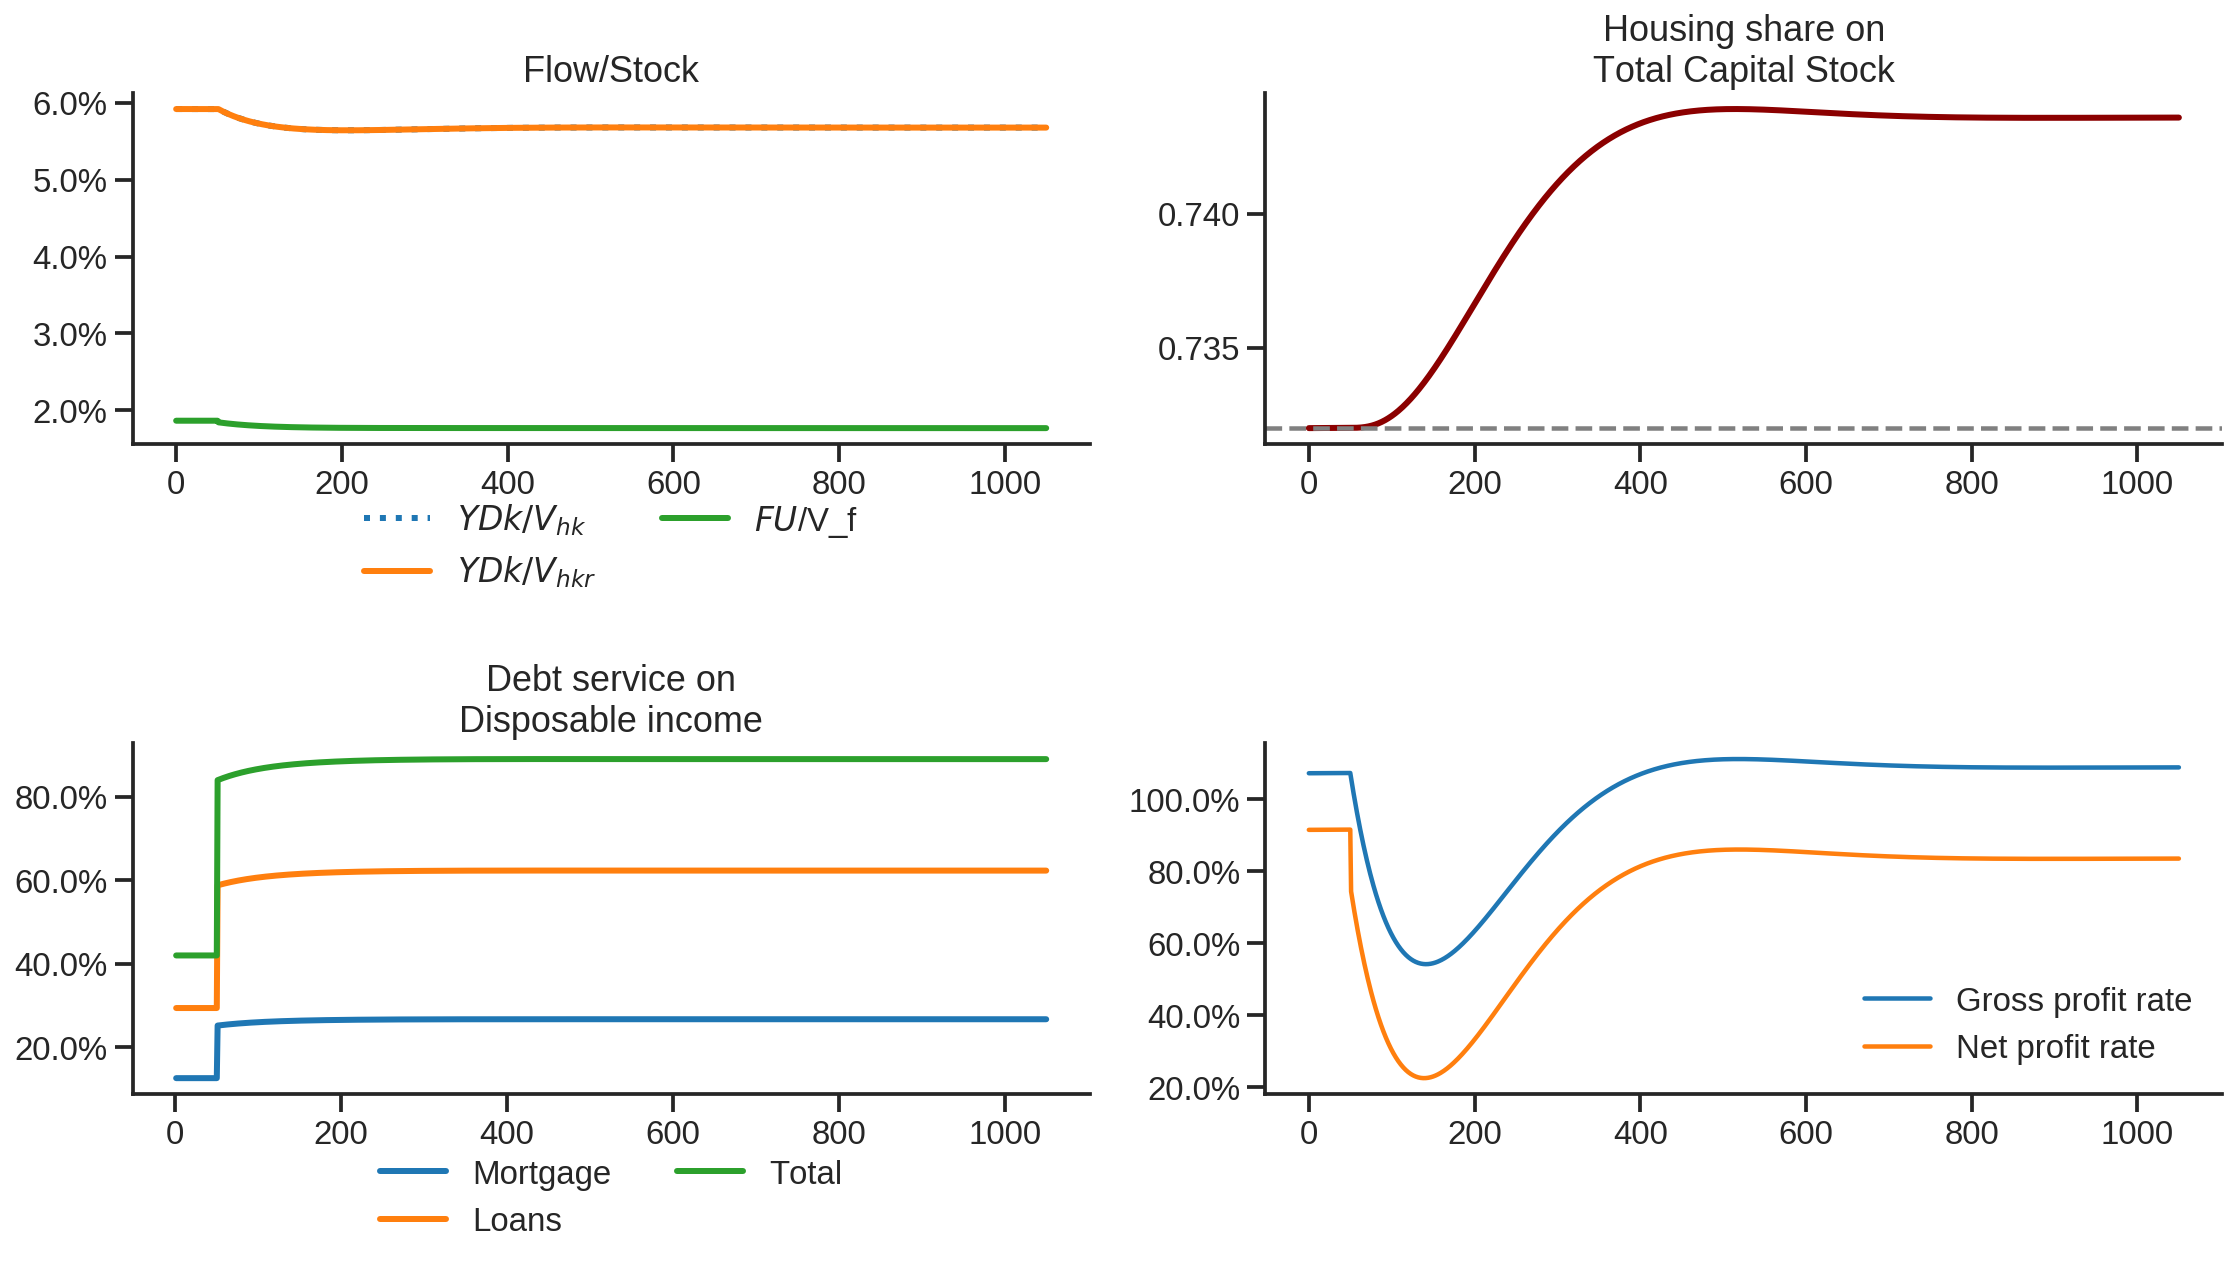

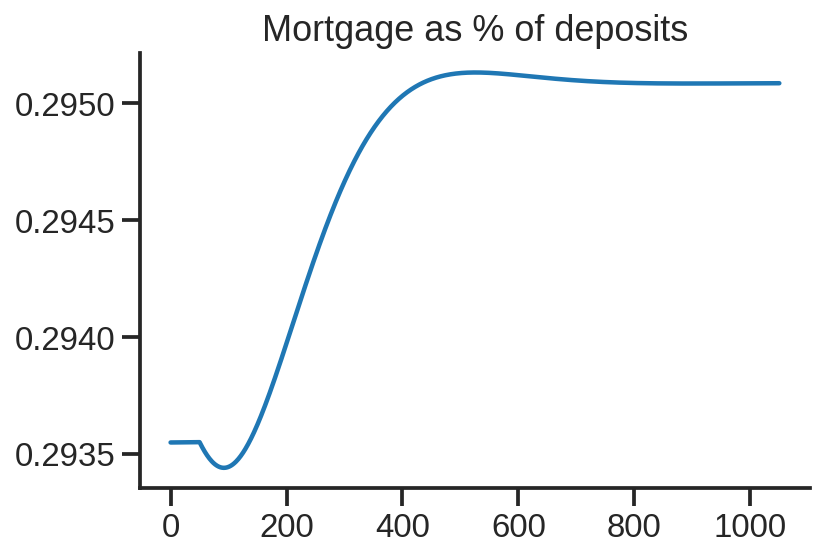

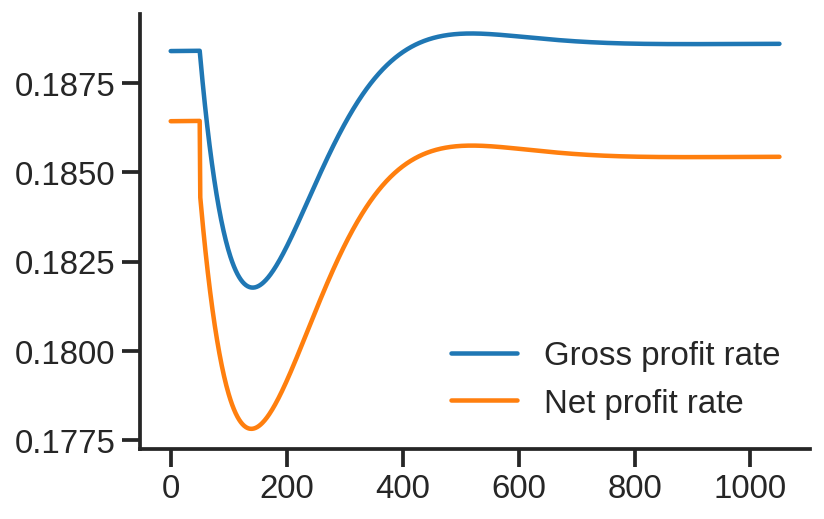

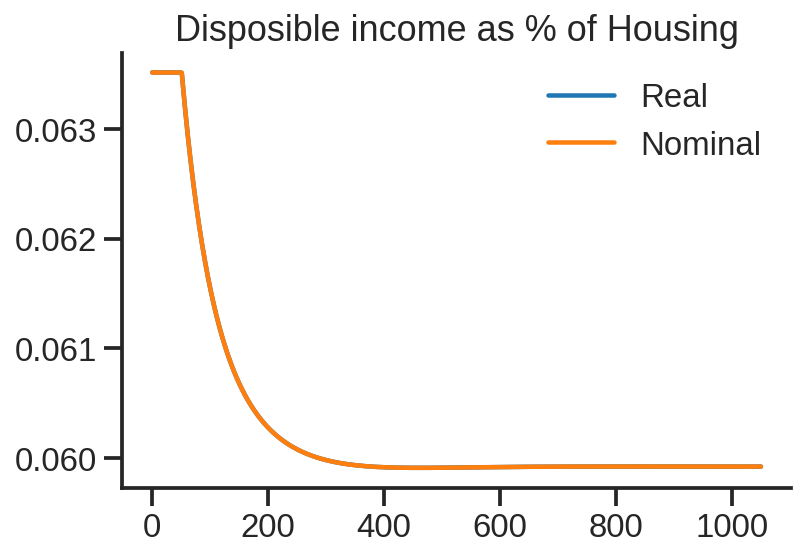

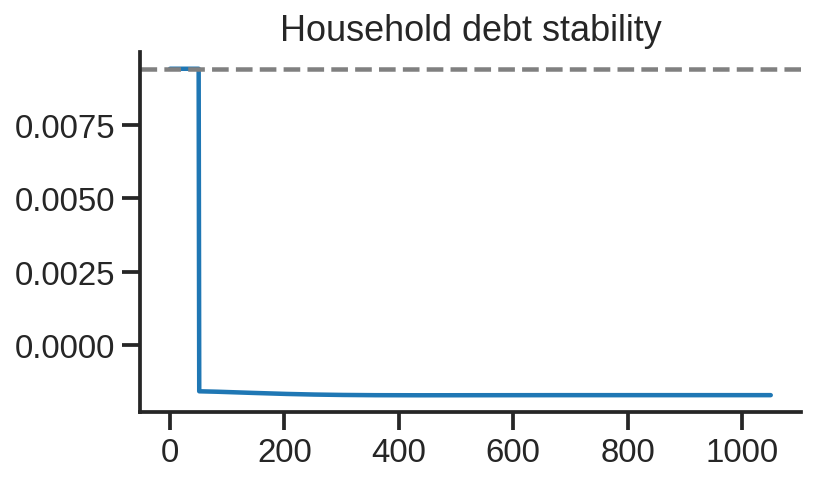

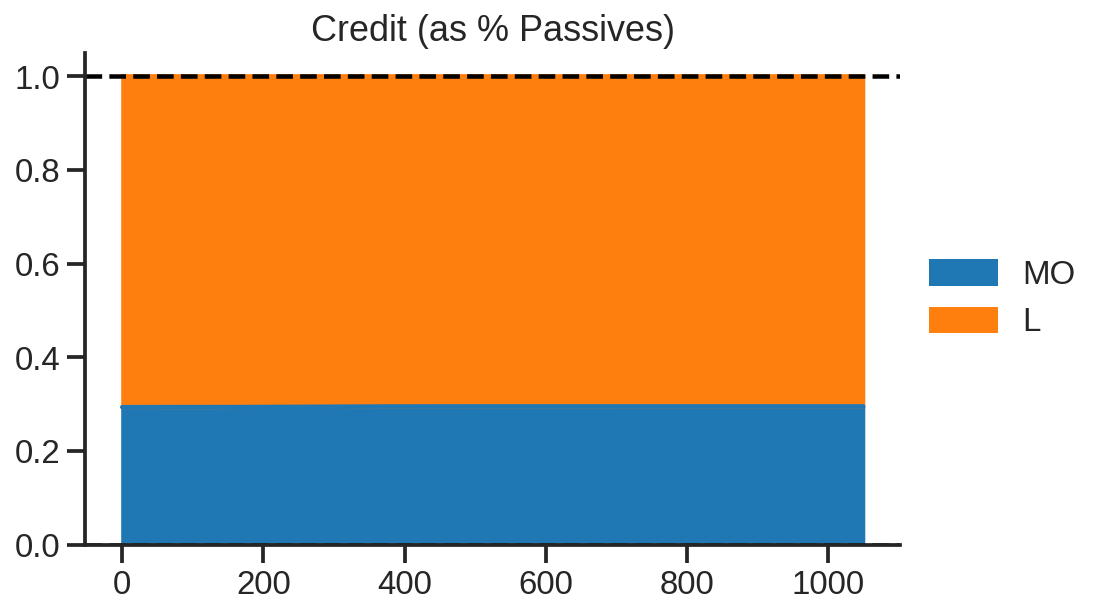

In [7]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='rm', increase=0.01, time = 1000)
shock3 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock3.columns = ['$\Delta rm$']
clock_plots(shock = shock, filename = 'Clock_3.eps', variable='rmo')
plot_shock(shock = shock, filename = 'Shock_3.eps', df=df)
plot_norms(shock = shock, filename = 'Shock_3Norms.eps', df=df)
other_plots(shock, df=df)

## Increase in inflation

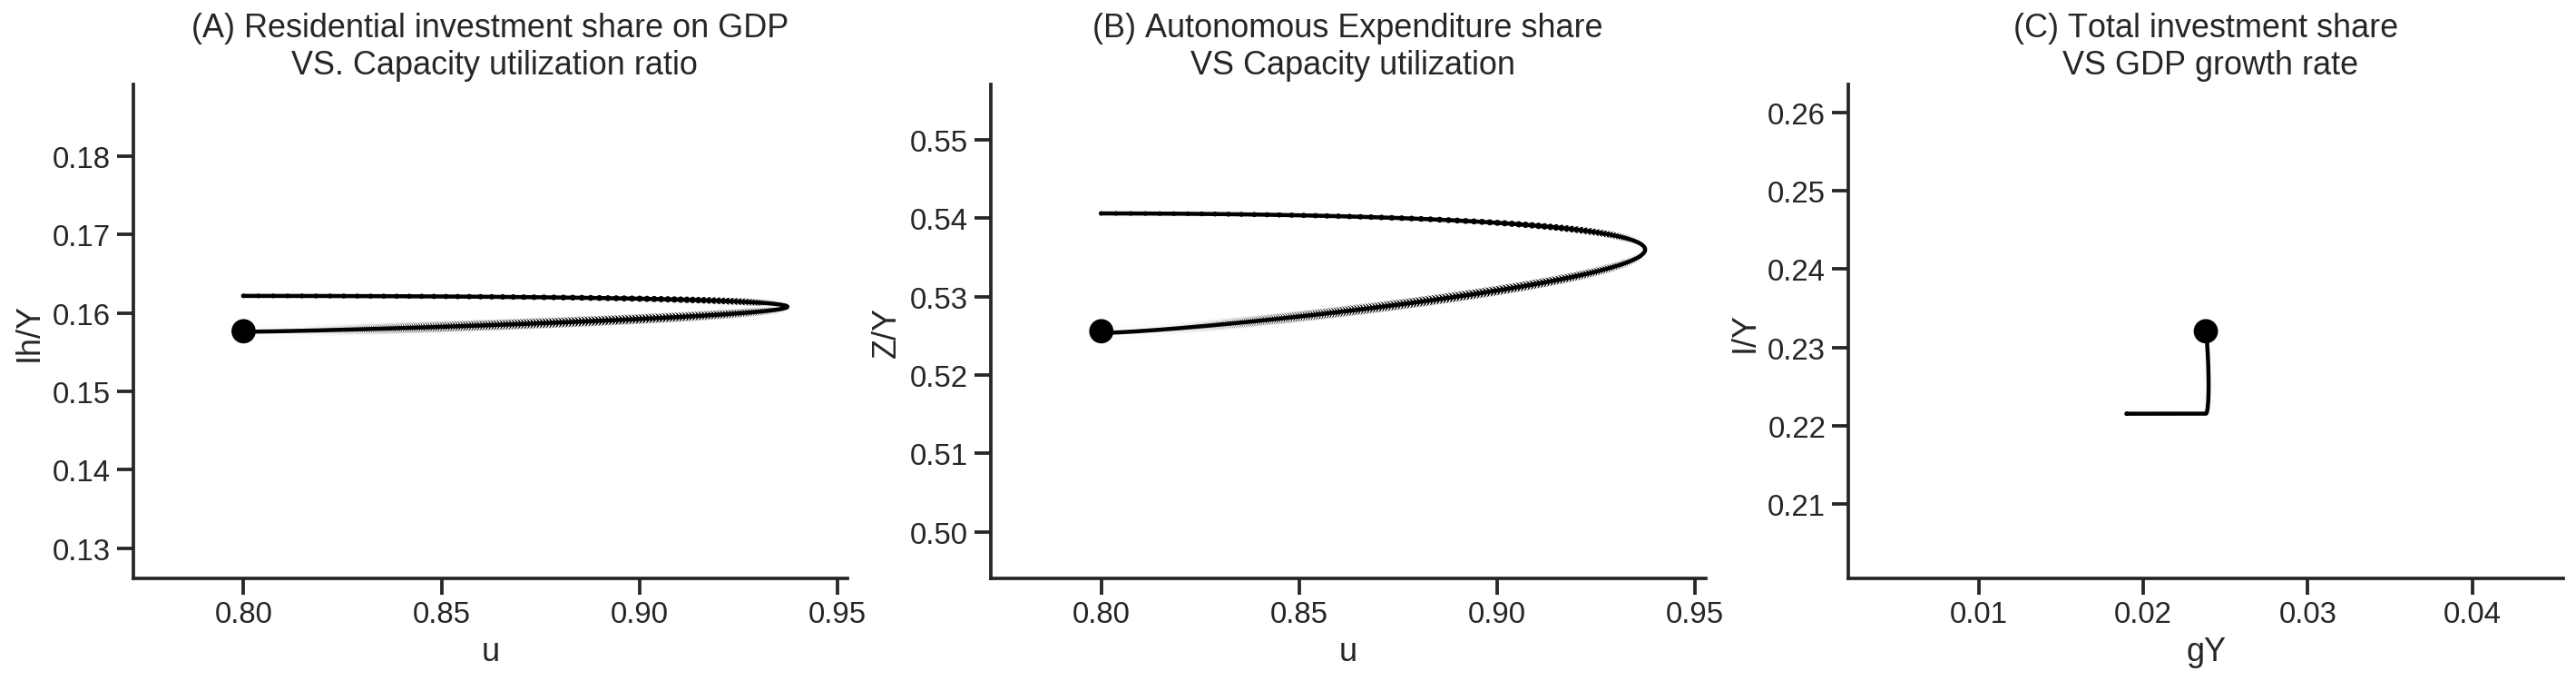

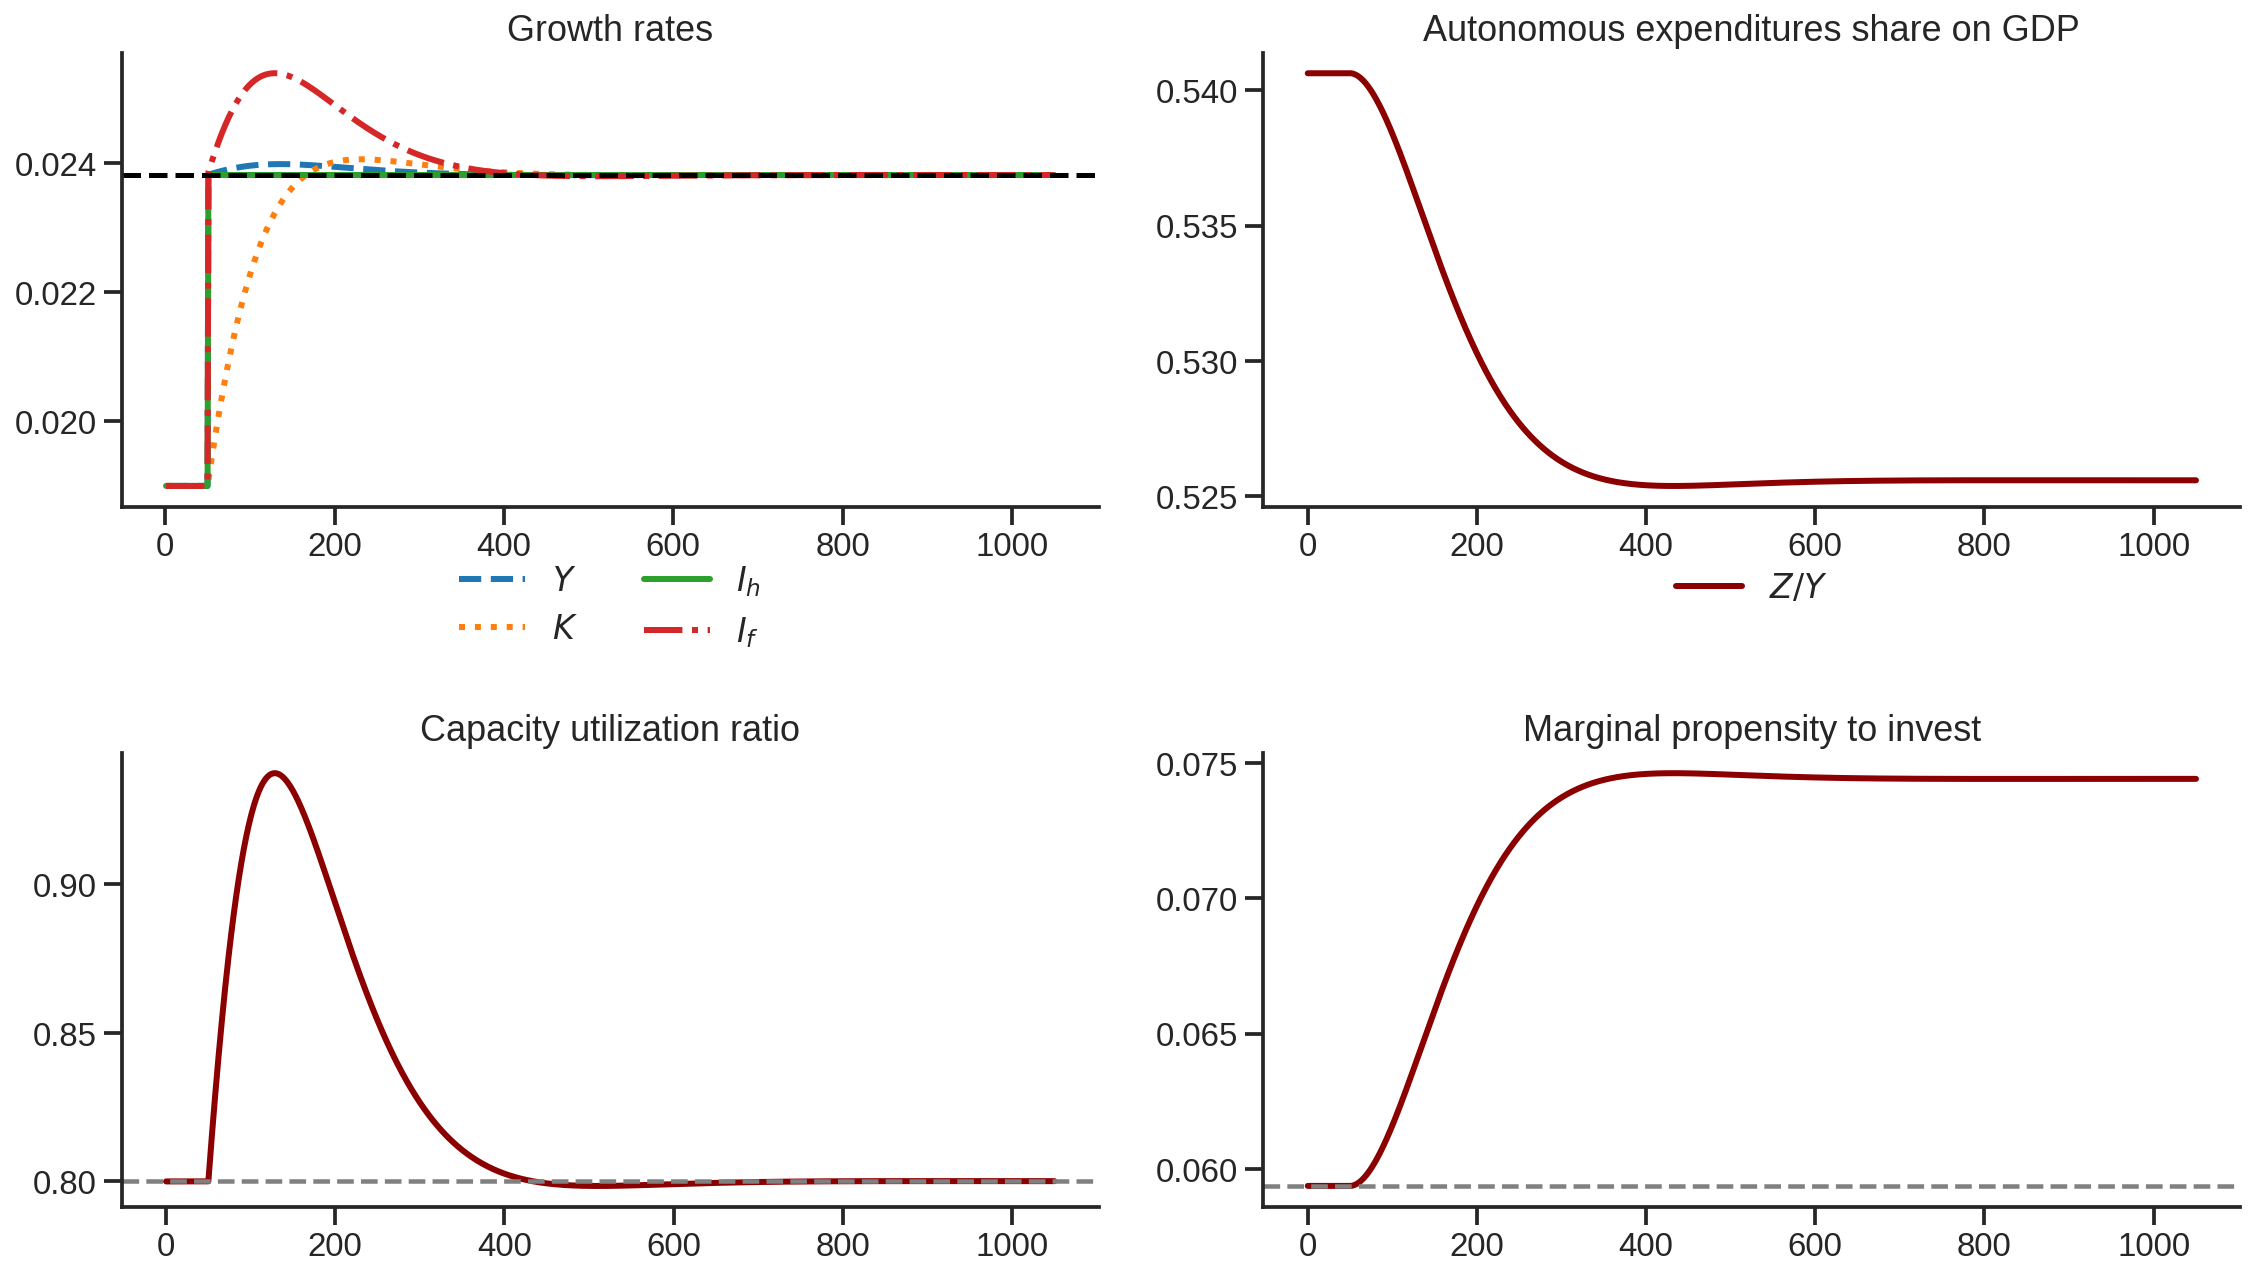

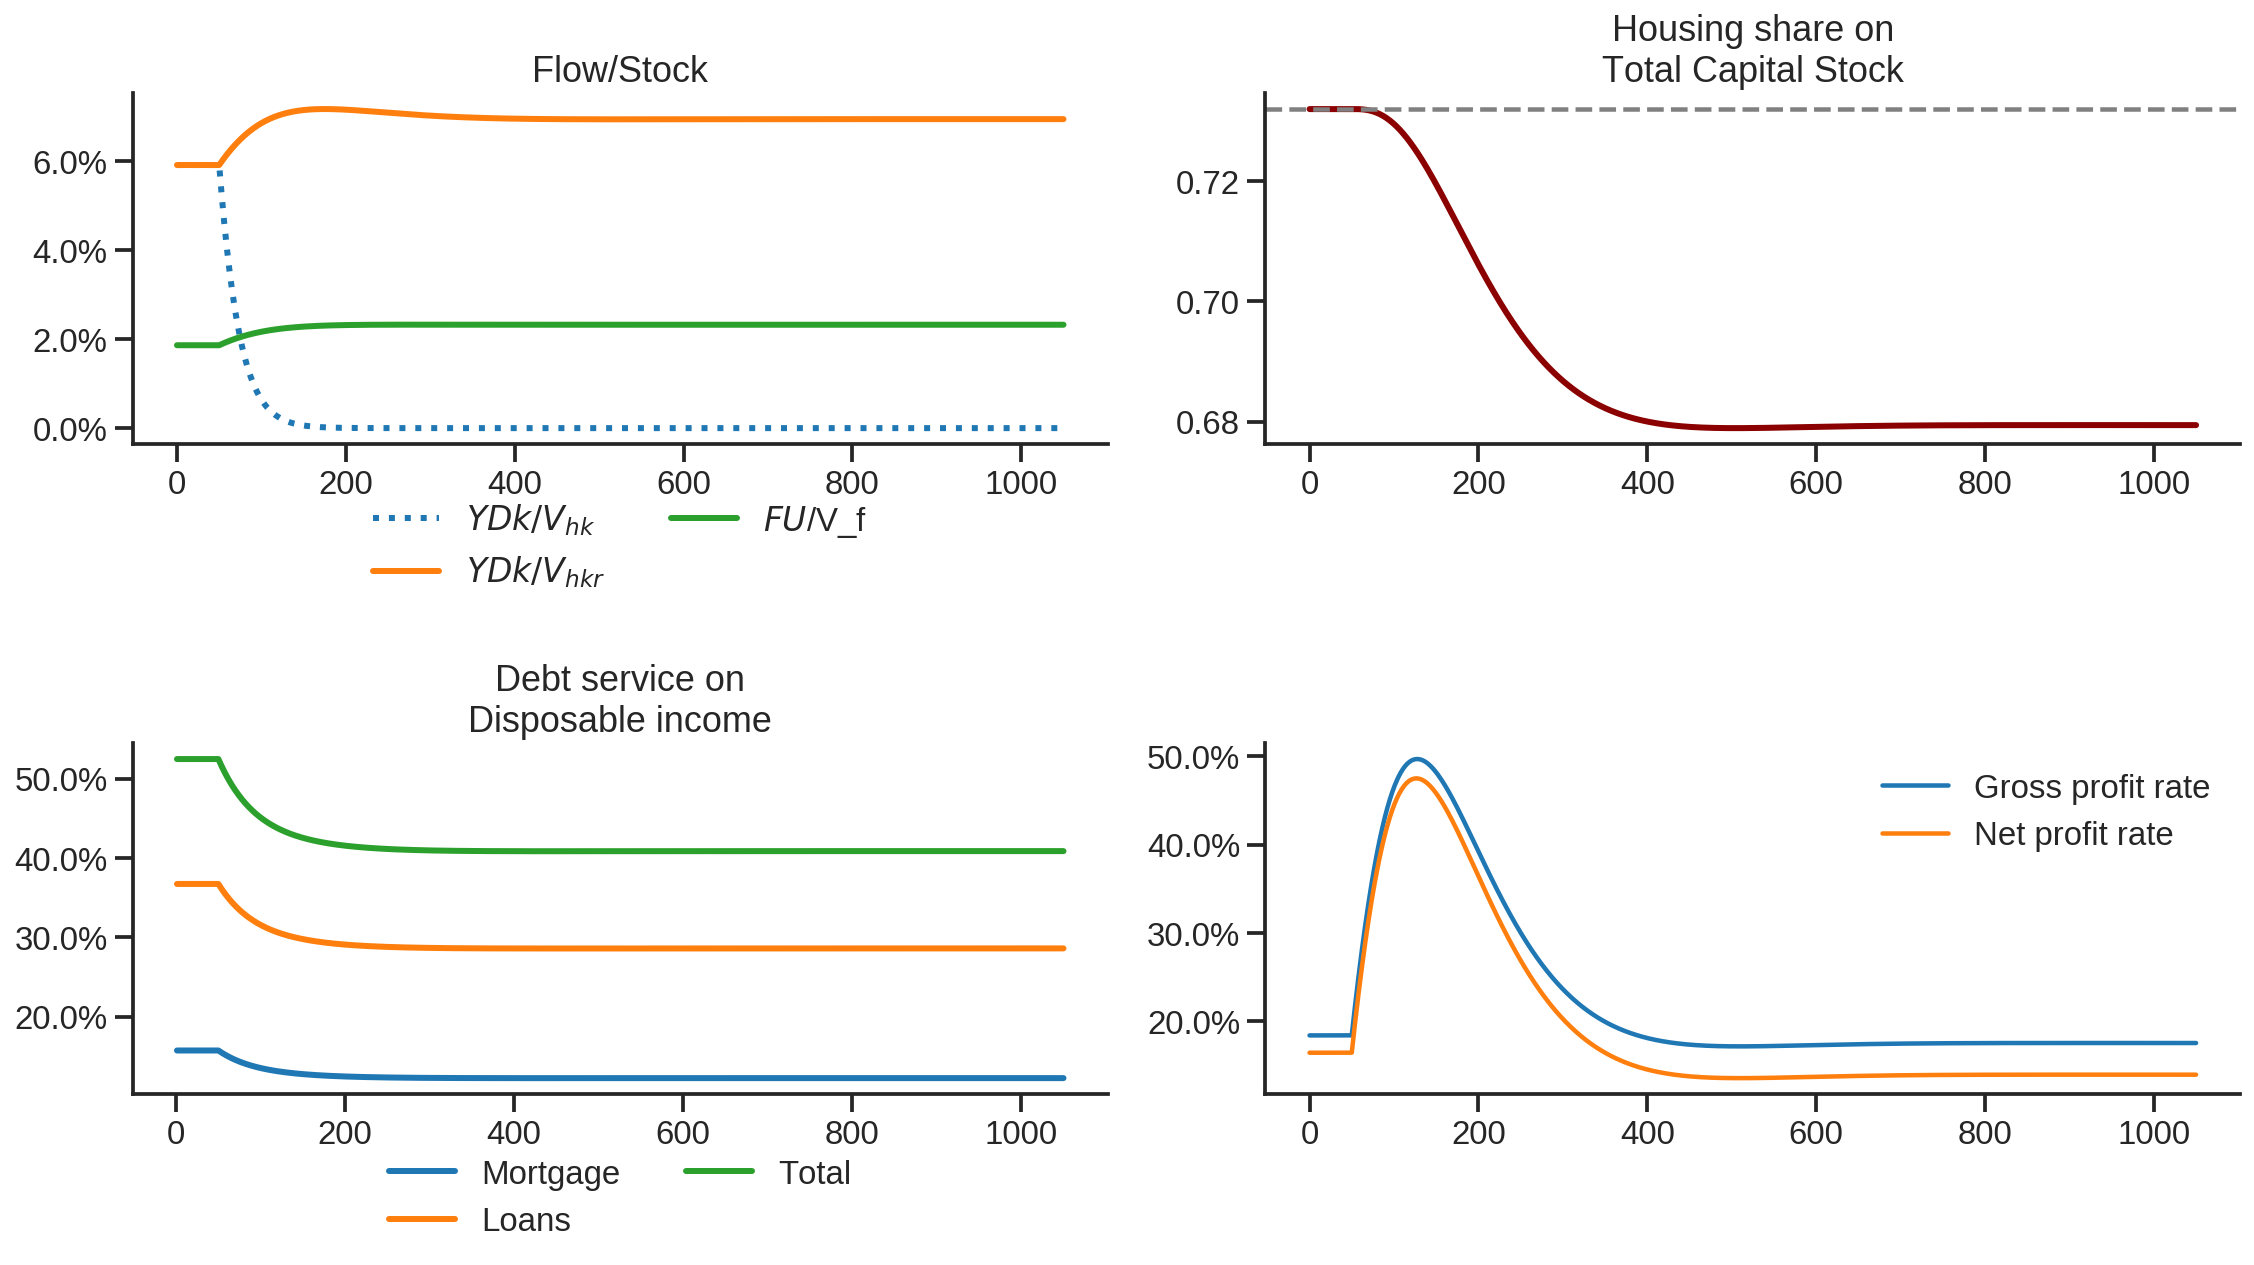

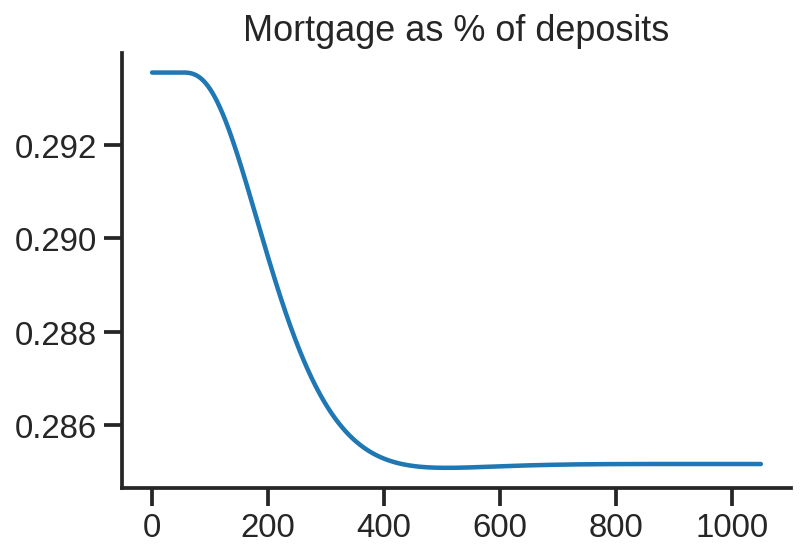

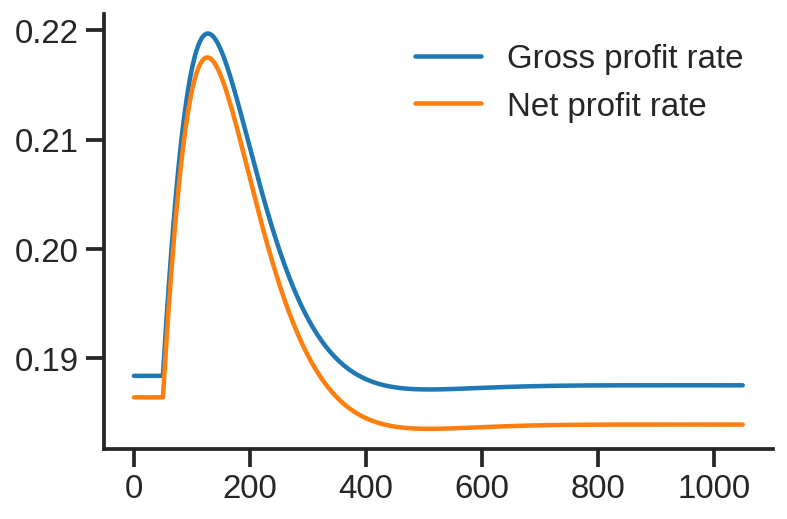

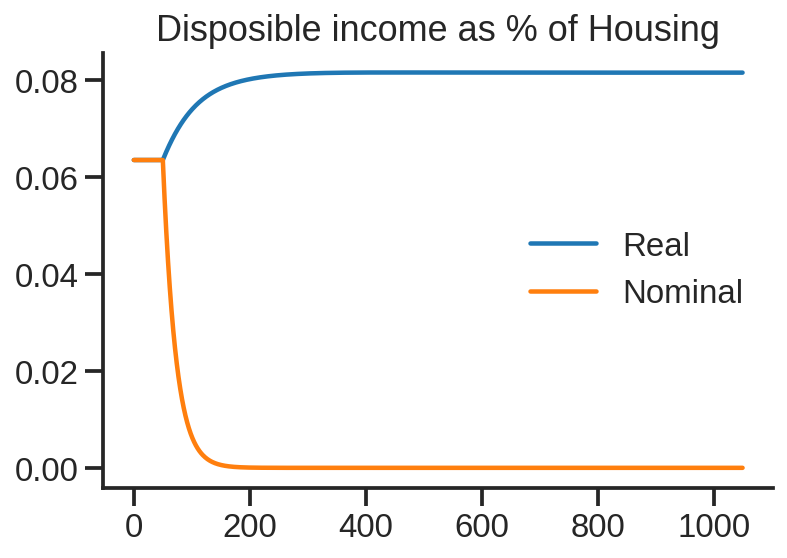

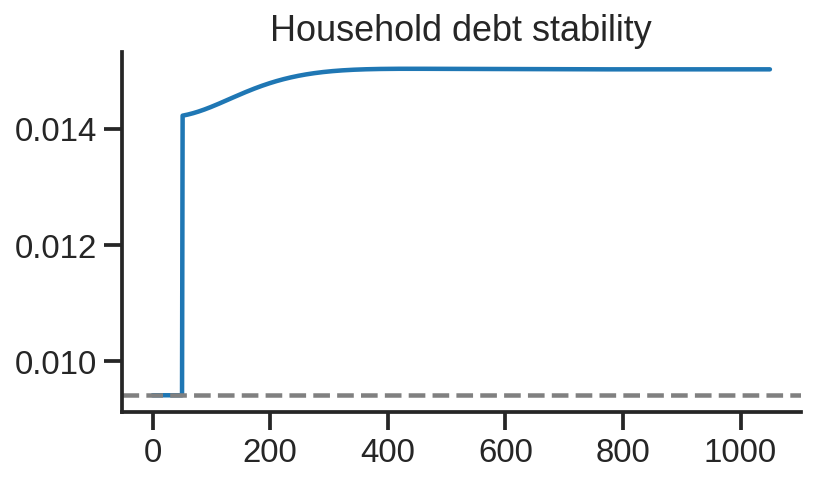

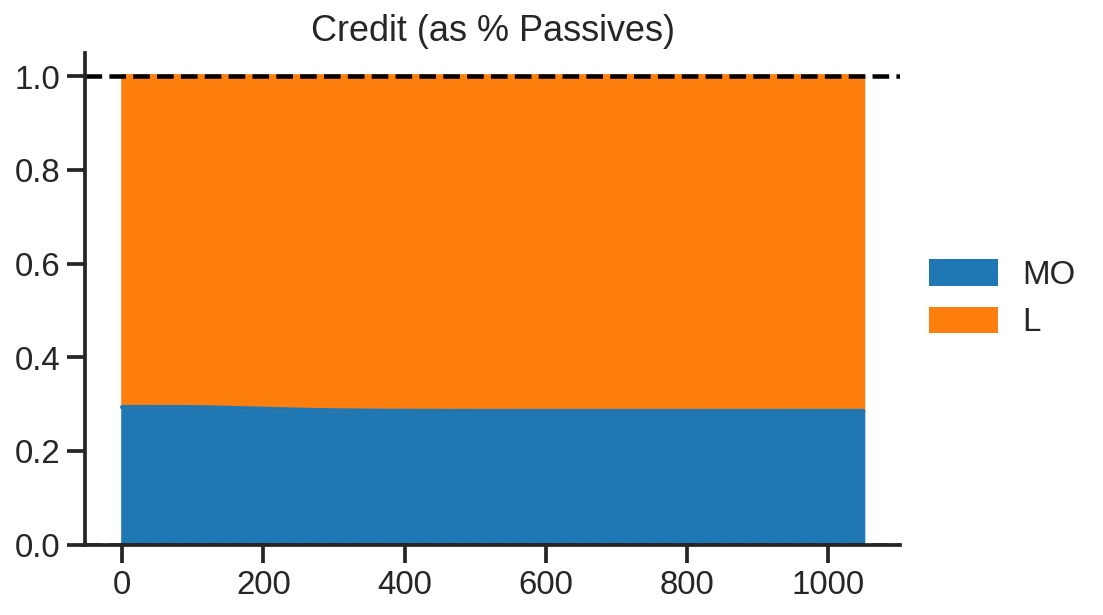

In [8]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='infla', increase=0.05, time = 1000)

clock_plots(shock = shock, filename = 'Clock_4.eps', variable='infla')
plot_shock(shock = shock, filename = 'Shock_4.eps', df=df)
plot_norms(shock = shock, filename = 'Shock_4Norms.eps', df=df)
other_plots(shock, df=df)

shock4 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock4.columns = ['$\pi$']

## Increase in Loans interest rates

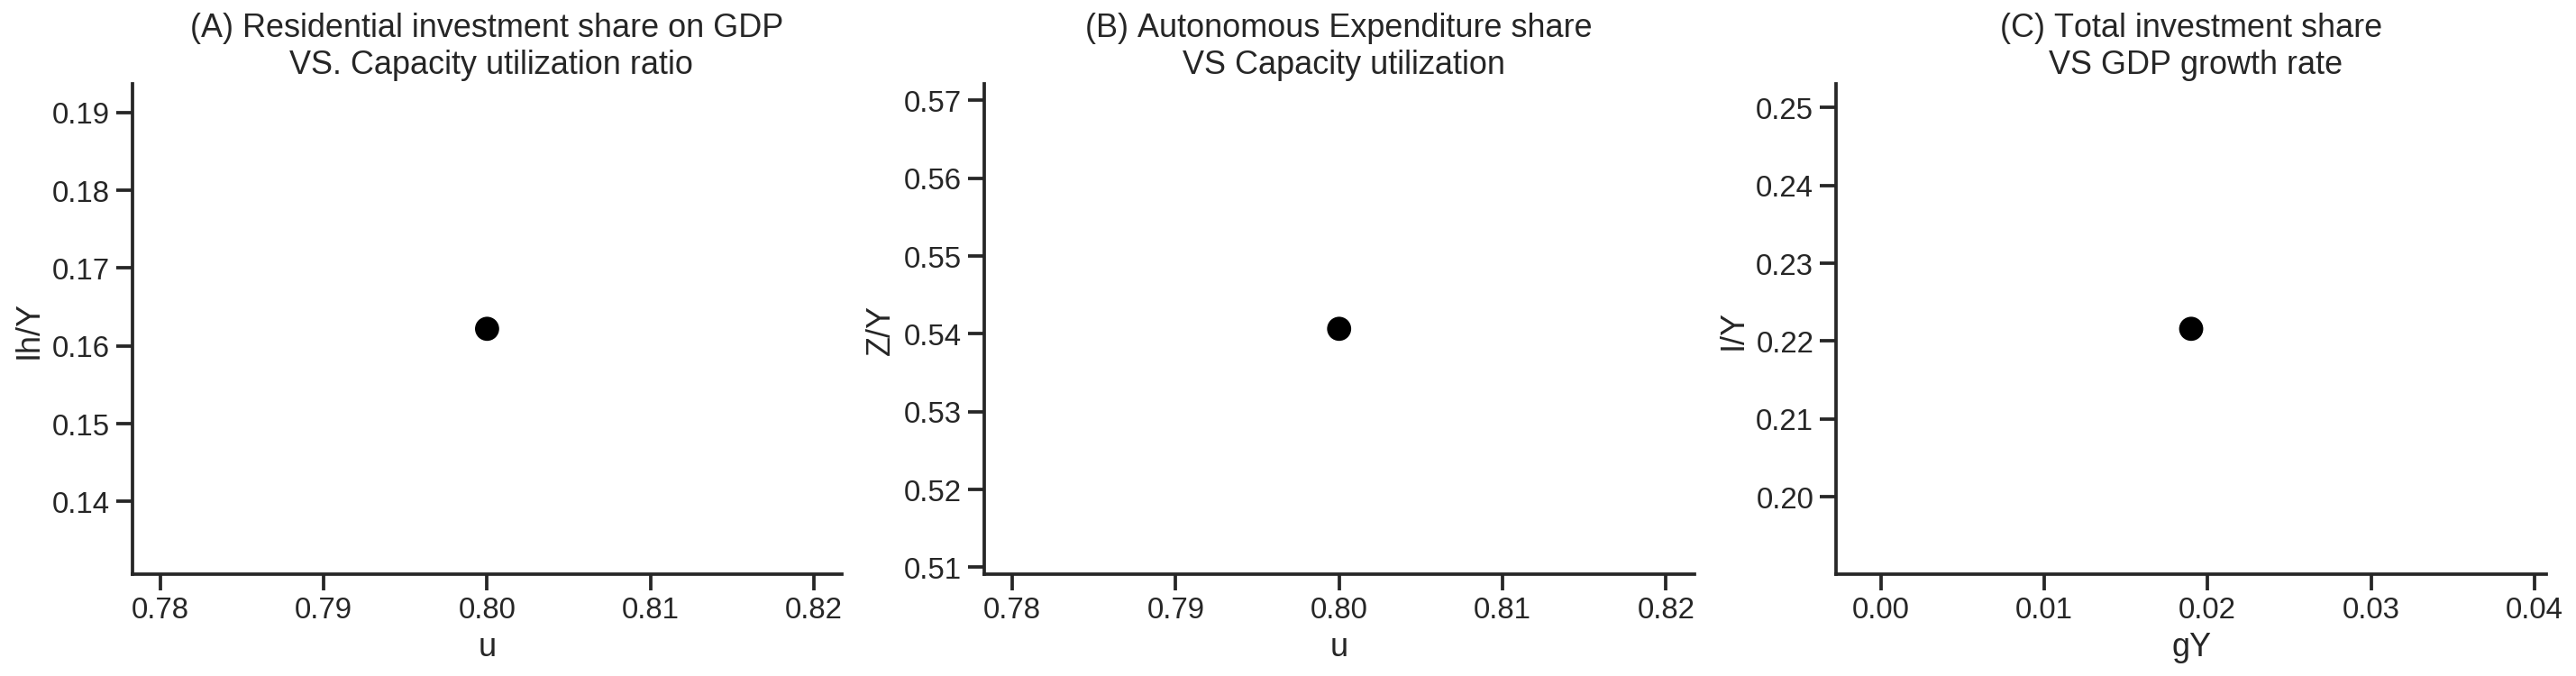

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


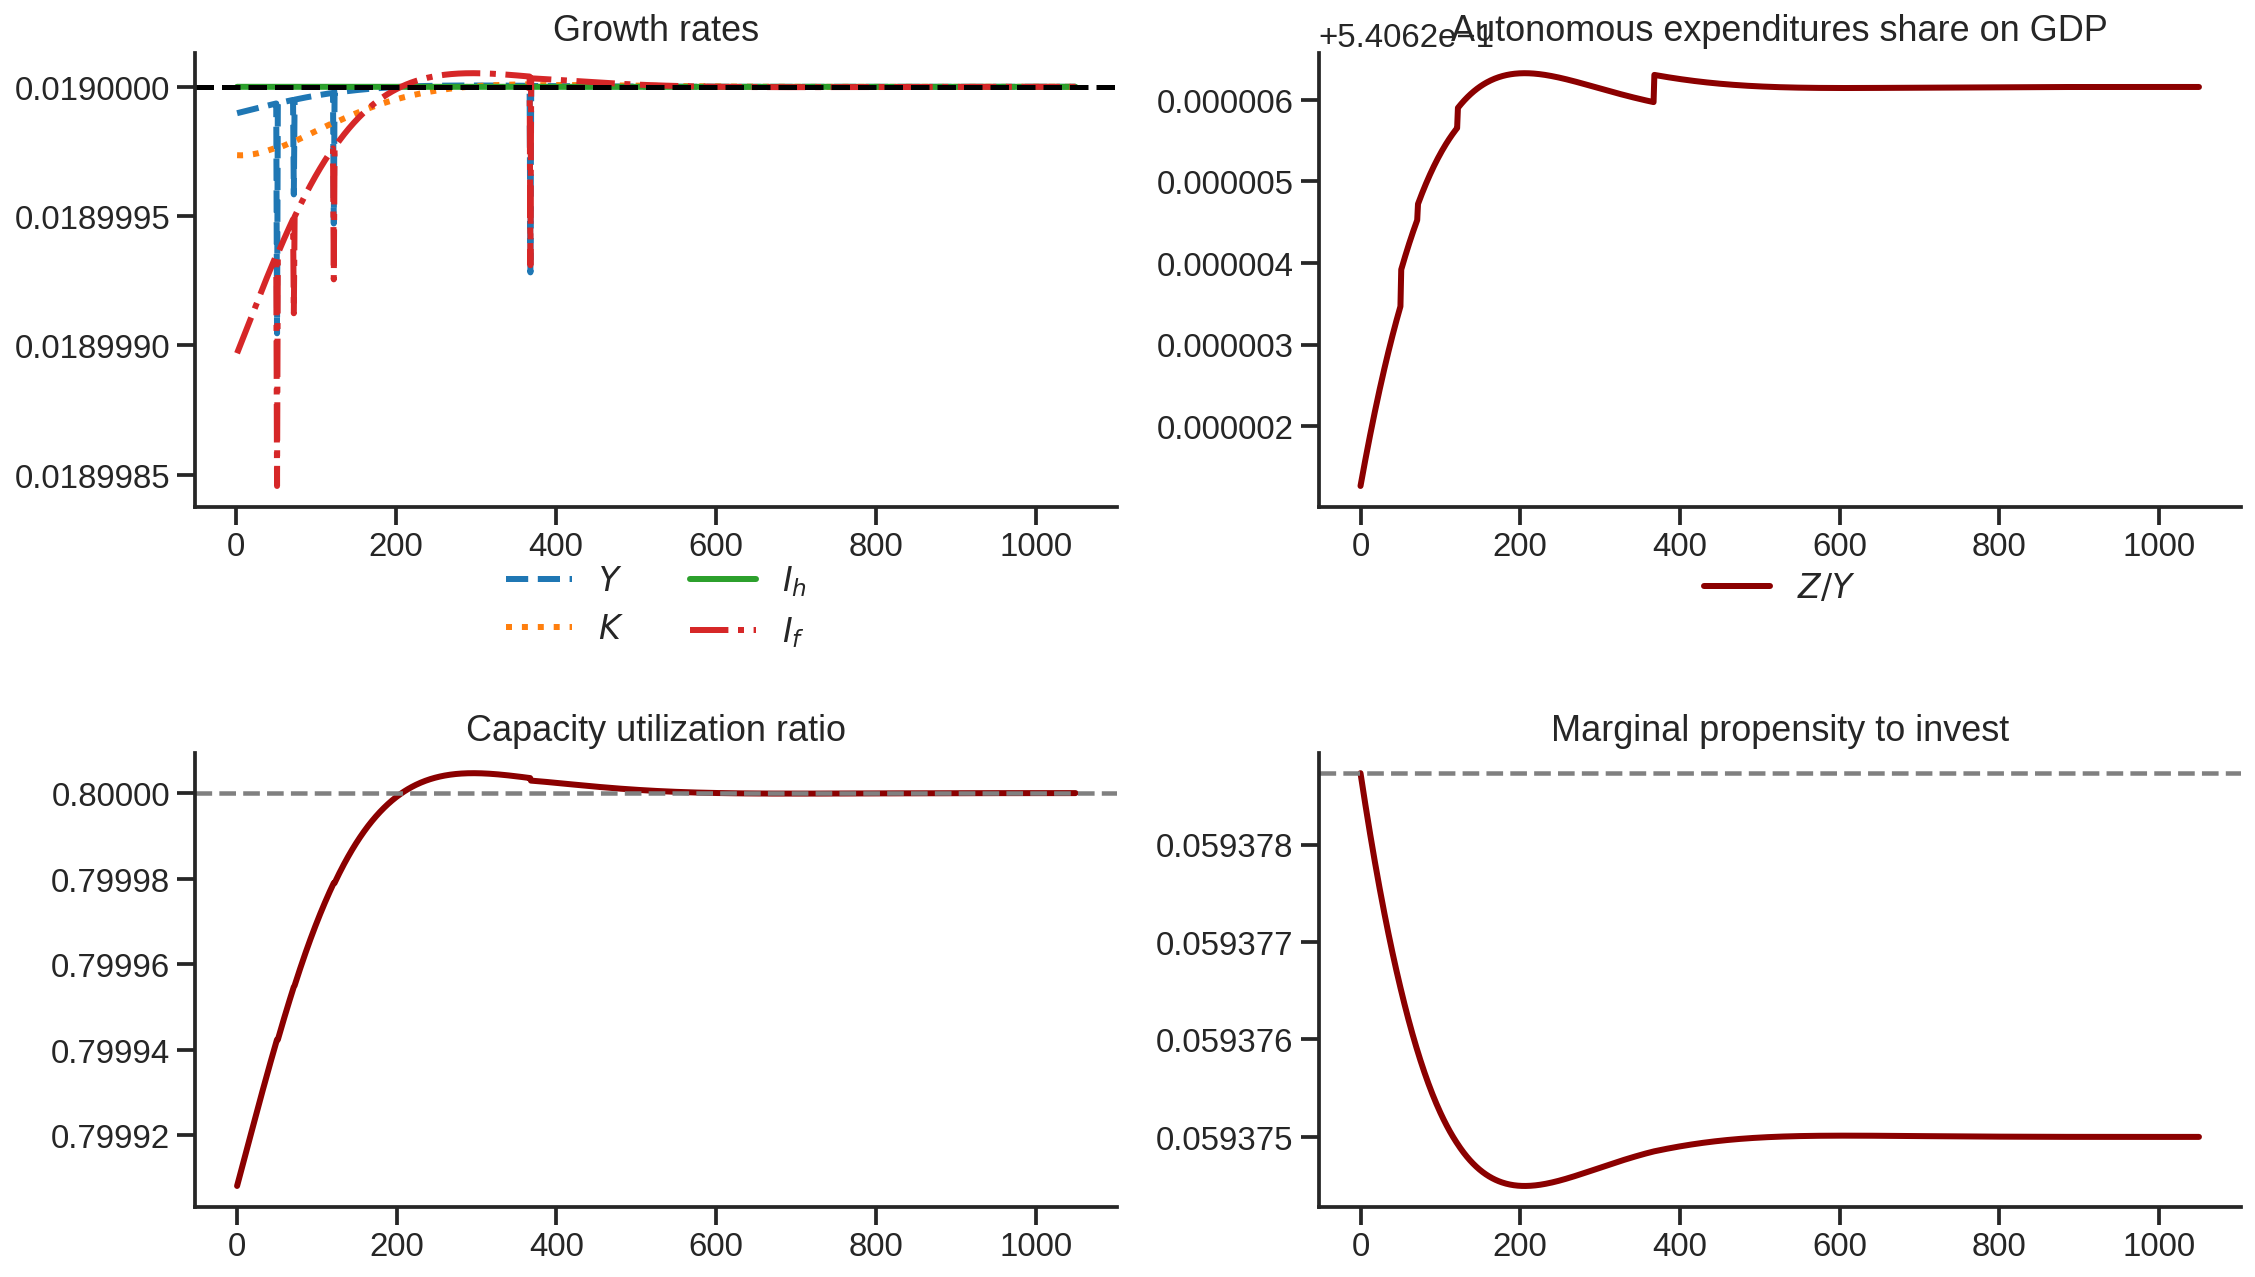

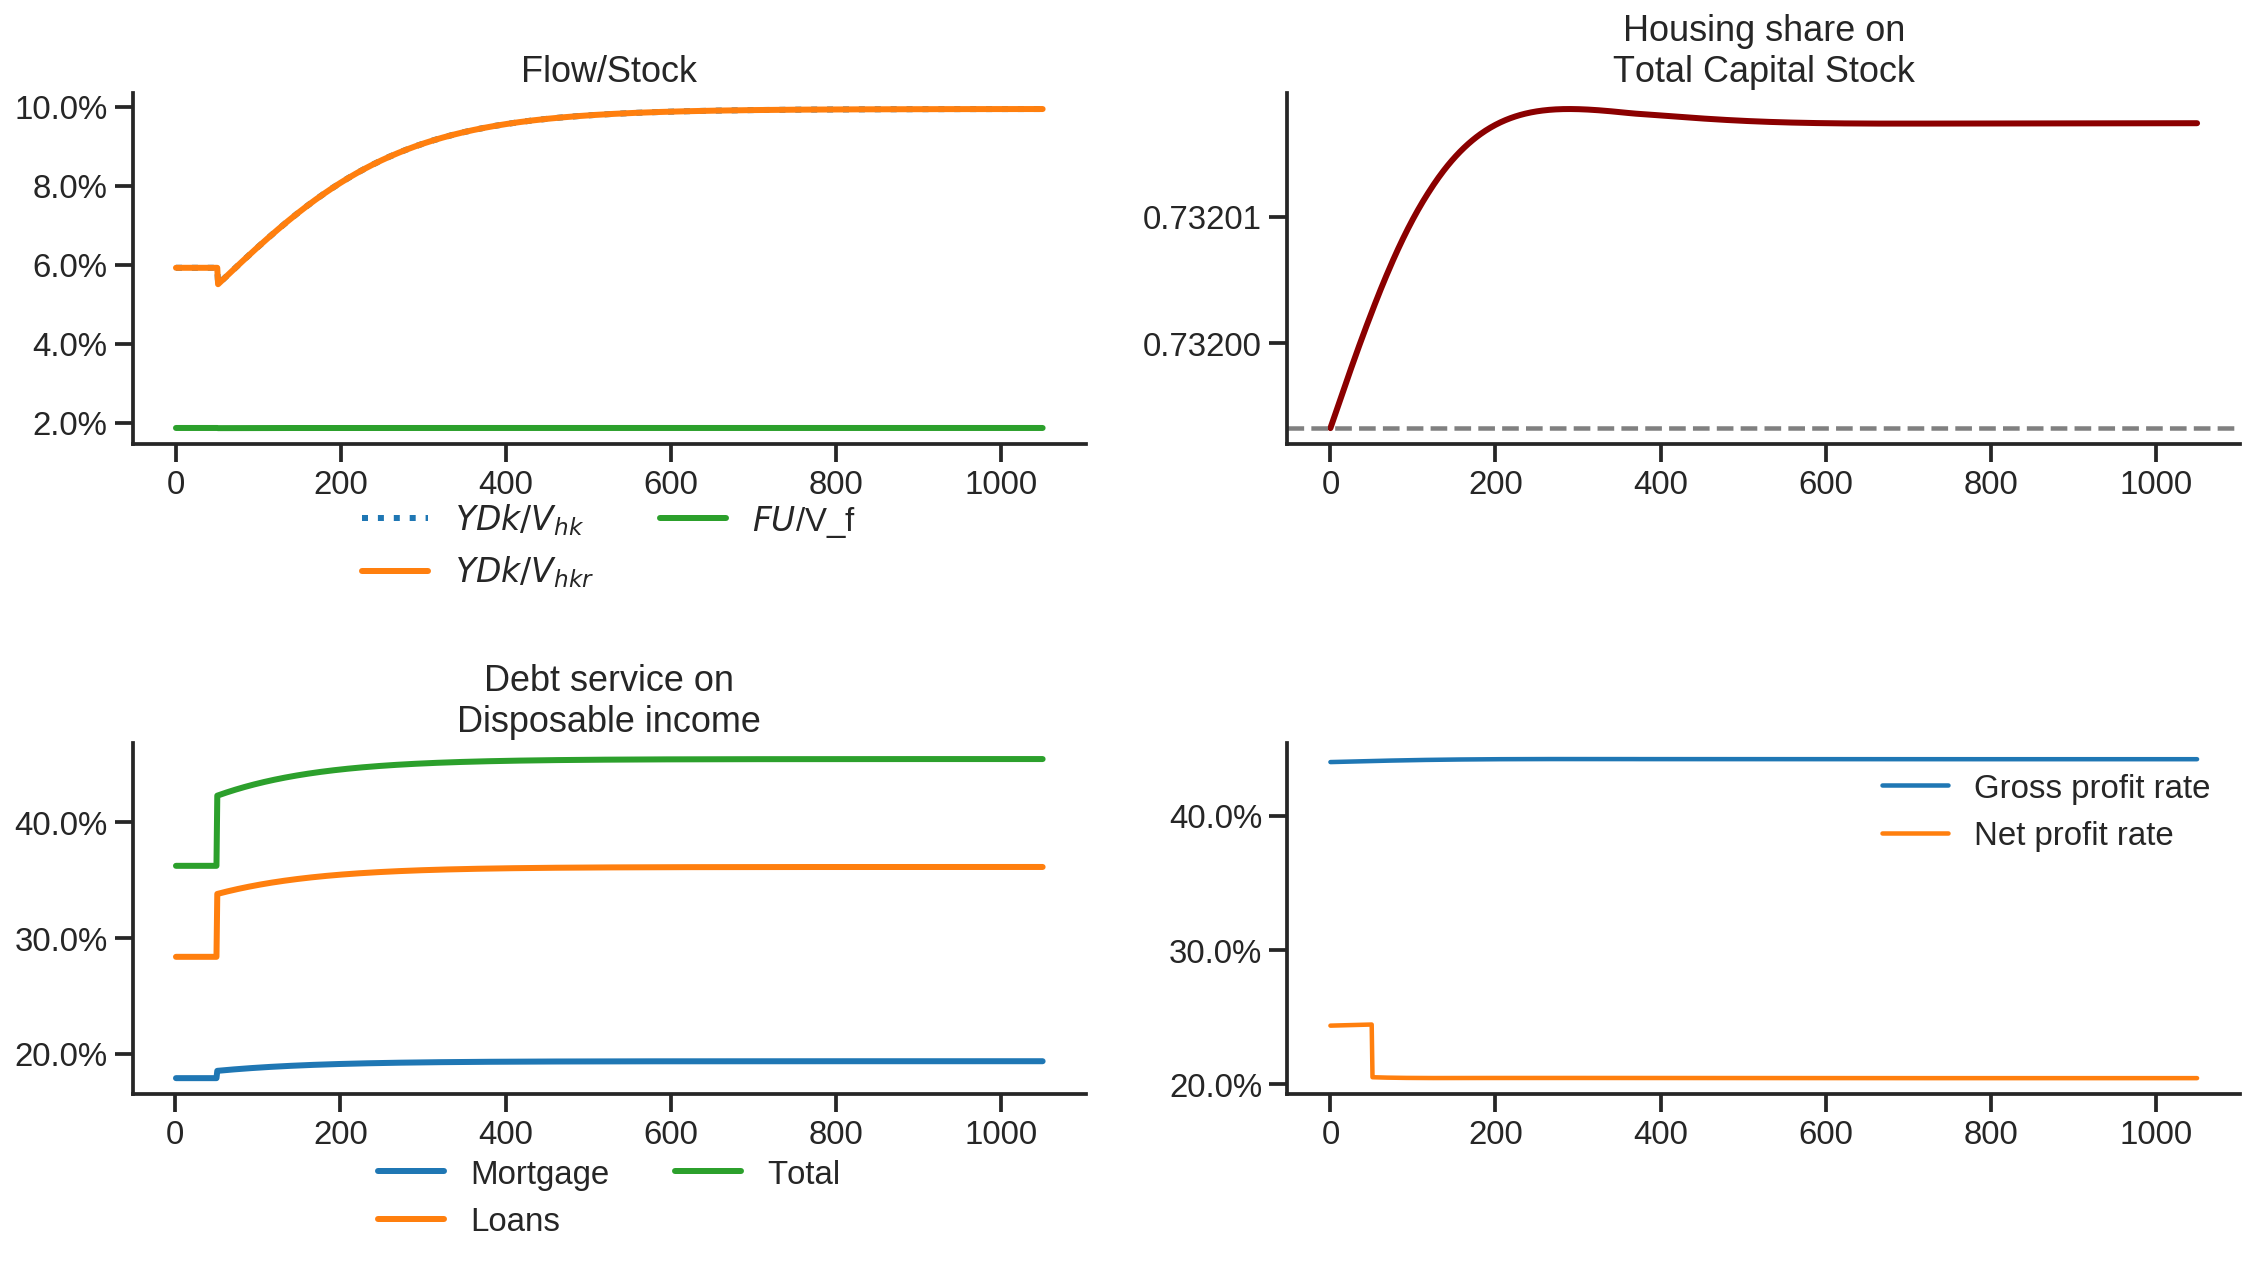

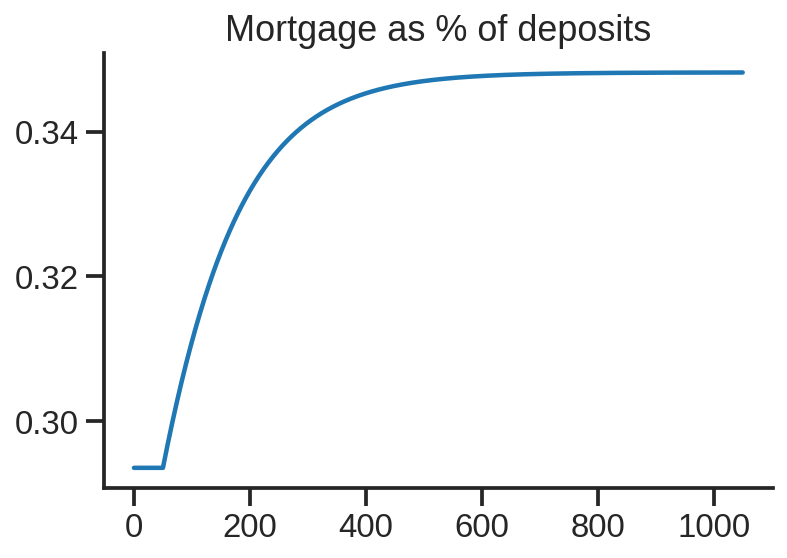

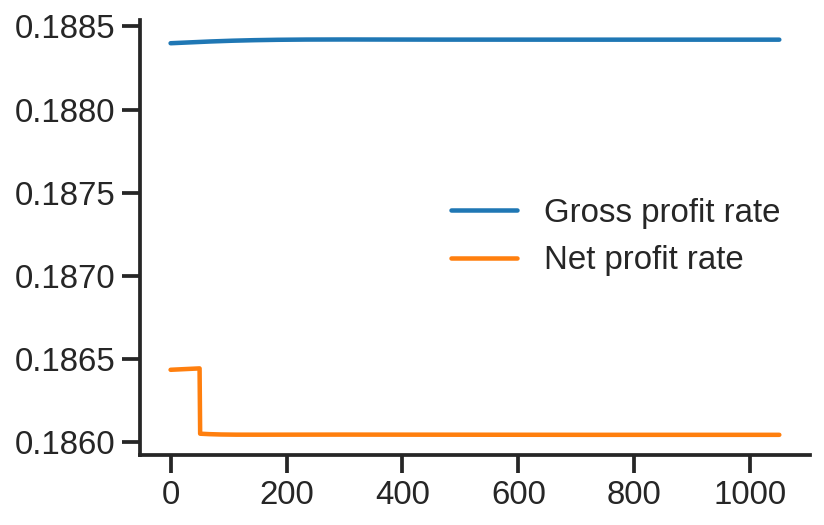

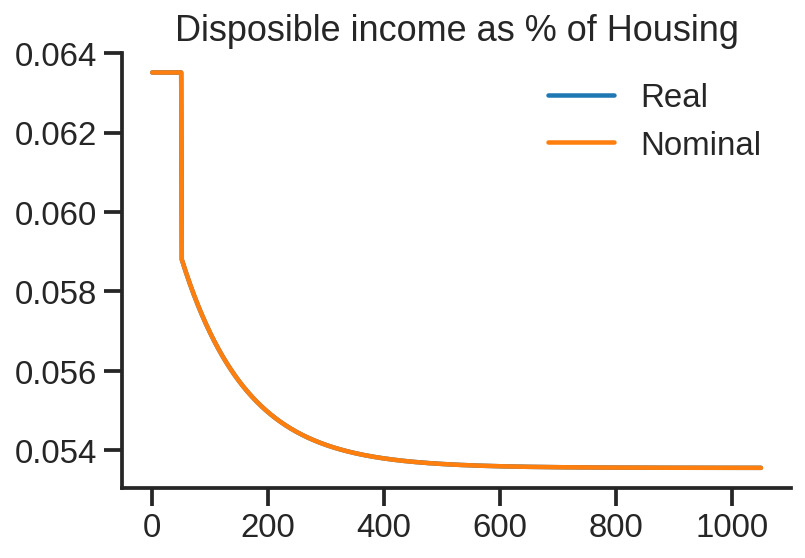

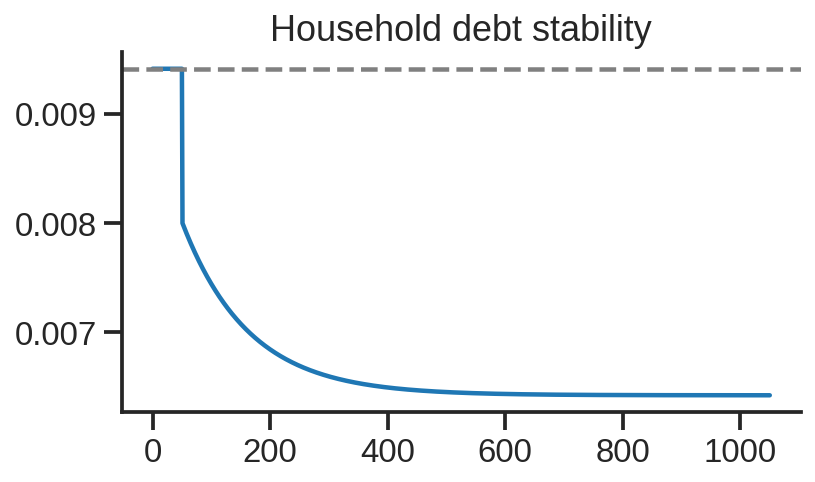

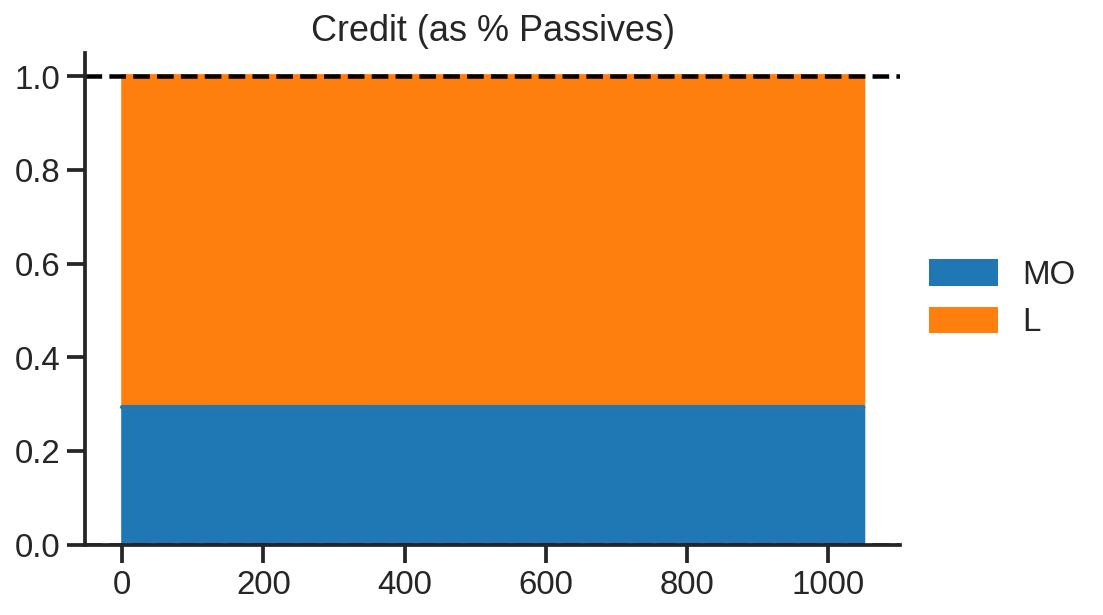

In [11]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='spread_l', increase=0.2, time = 1000)
shock5 = shock.round(decimals = 5).tail(1).transpose().loc['alpha':,:]
shock5.columns = ['$\Delta rl$']
clock_plots(shock = shock, filename = 'Clock_5.eps', variable='rmo')
plot_shock(shock = shock, filename = 'Shock_5.eps', df=df)
plot_norms(shock = shock, filename = 'Shock_5Norms.eps', df=df)
other_plots(shock, df=df)

# Merging tables

In [12]:
base = model()
df = SolveSFC(base, time=1000)
df = df.round(decimals = 4).tail(1).transpose().loc['alpha':,:]
df.columns = ['Base scenario']

table = pd.merge(left = df, right = shock1, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock2, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock3, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock4, left_index = True, right_index = True)
table = table.loc[:"infla",:] ######### Warning
table.index = [ ######### Warning
    '$\\alpha$',
    '$\gamma_F$',
    '$\gamma_u$',
    '$\omega$',
    '$rm$',
    '$\sigma_{l}$',
    '$\sigma_{mo}$',
    '$u_N$',
    '$v$',
    '$\phi_0$',
    '$\phi_1$',
    '$R$',
    '$\pi$'
]
table.to_latex(
    "../tabs/parameters.tex", bold_rows = True, 
    column_format = 'cccccc', decimal = ',', escape=False, 
    float_format="{:0.4f}".format,
)
table


Base scenario  $\Delta \phi_0$  $\Delta \omega$  $\Delta rm$  \
$\alpha$                1.00            1.000             1.00         1.00   
$\gamma_F$              0.08            0.080             0.08         0.08   
$\gamma_u$              0.01            0.010             0.01         0.01   
$\omega$                0.40            0.400             0.30         0.40   
$rm$                    0.01            0.010             0.01         0.02   
$\sigma_{l}$            0.00            0.000             0.00         0.00   
$\sigma_{mo}$           0.00            0.000             0.00         0.00   
$u_N$                   0.80            0.800             0.80         0.80   
$v$                     2.50            2.500             2.50         2.50   
$\phi_0$                0.02            0.025             0.02         0.02   
$\phi_1$                0.10            0.100             0.10         0.10   
$R$                     0.70            0.700             0.70         0.70   
$\pi$                   0.00            0.000             0.00         0.00   

               $\pi$  
$\alpha$        1.00  
$\gamma_F$      0.08  
$\gamma_u$      0.01  
$\omega$        0.40  
$rm$            0.01  
$\sigma_{l}$    0.00  
$\sigma_{mo}$   0.00  
$u_N$           0.80  
$v$             2.50  
$\phi_0$        0.02  
$\phi_1$        0.10  
$R$             0.70  
$\pi$           0.05

# Dag

/home/gpetrini/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/gpetrini/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


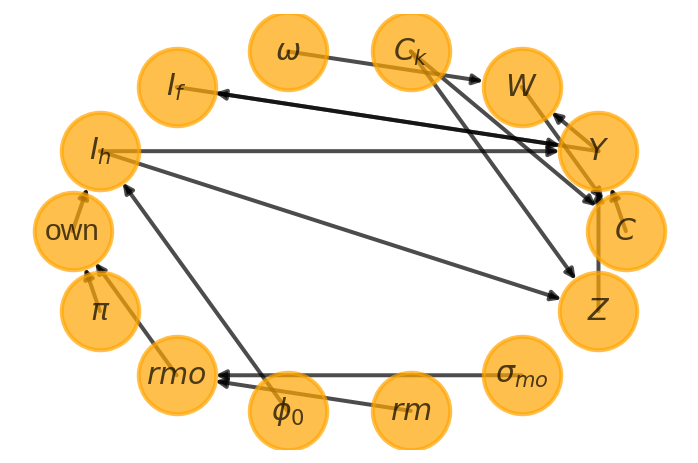

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [13]:
df = pd.DataFrame(
    {
        'Determined' : [
            '$Y$', # 1
            #'$Y$', # 2
            '$C$','$C$', # 3
            '$W$', # 5
            '$Y$', # 7
            '$Y$', # 8
            '$I_h$', # 9
            'own', # 10
            'own', # 11
            '$I_f$', # 12
            '$I_h$', # 13
            '$rmo$', # 14
            '$rmo$', # 15,
            '$W$', # 16,
            '$Z$',
            '$Z$', 
            '$Y$',
        ], 
        'Determines' : [
            '$C$',  # 1
            #'$It$', # 2
            '$W$', '$C_k$', # 3
            '$\omega$', # 5
            '$I_f$', # 7
            '$I_h$', # 8
            'own', # 9
            '$\pi$', # 10
            '$rmo$', # 11
            '$Y$', # 12,
            '$\phi_0$', # 13
            '$rm$', # 14
            '$\sigma_{mo}$', # 15
            '$Y$', # 16
            '$C_k$',
            "$I_h$",
            '$Z$',
        ]
}
)
 
# Build your graph
G=nx.from_pandas_edgelist(
    df, 
    'Determines', 
    'Determined', 
    create_using=nx.DiGraph() # To use with arrows
)
 
    
fig, ax = plt.subplots()
    
# Plot it
nx.draw(
    G, 
    with_labels=True, 
    node_color='orange', 
    node_size=1500, 
    edge_color='black', 
    linewidths=2,
    width=2,
    arrows=True,
    font_size=15,
    alpha=.7, 
    ax = ax,
    #pos=nx.spring_layout(G),
    #pos=nx.fruchterman_reingold_layout(G),
    pos=nx.shell_layout(G),
)

plt.show()
fig.savefig('../figs/Dag.eps', dpi = 600)